# Klasterizacija kupaca radi targetiranog marketinga 

## Učitavanje dataset-a i njegova analiza

In [1]:
%pip install seaborn
%pip install scipy
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import boxcox
import pylab
from sklearn.preprocessing import OneHotEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import Lasso


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
data = pd.read_csv("customer_data.csv")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/12,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/14,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/13,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/14,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/14,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
print(data["Z_CostContact"].unique())
print(data["Z_Revenue"].unique())

[3]
[11]


Vizuelnom inspekcijom podataka primećeno je da kolone "Z_CostContact" i "Z_Revenue" imaju varijansu 0, odnosno da su sve vrednosti u koloni iste. Zbog toga su ove dve kolone odbačene.

In [5]:
data.drop("Z_CostContact", axis=1, inplace=True)
data.drop("Z_Revenue", axis=1, inplace=True)
data.drop("ID", axis=1, inplace=True)

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

Sada ćemo izvršiti analizu svake od kolona i prikazati raspodele podataka unutar njih tamo gde je to moguće.

1893     1
1899     1
1900     1
1940     1
1941     1
1943     7
1944     7
1945     8
1946    16
1947    16
1948    21
1949    30
1950    29
1951    43
1952    52
1953    35
1954    50
1955    49
1956    55
1957    43
1958    53
1959    51
1960    49
1961    36
1962    44
1963    45
1964    42
1965    74
1966    50
1967    44
1968    51
1969    71
1970    77
1971    87
1972    79
1973    74
1974    69
1975    83
1976    89
1977    52
1978    77
1979    53
1980    39
1981    39
1982    45
1983    42
1984    38
1985    32
1986    42
1987    27
1988    29
1989    30
1990    18
1991    15
1992    13
1993     5
1994     3
1995     5
1996     2
Name: Year_Birth, dtype: int64


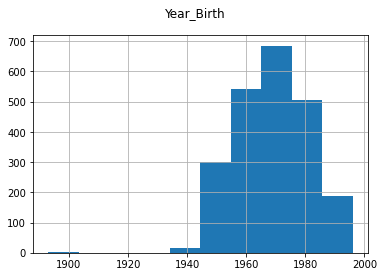

In [7]:
plt.suptitle("Year_Birth")
data["Year_Birth"].hist()
print(data['Year_Birth'].value_counts(dropna=False).sort_index())

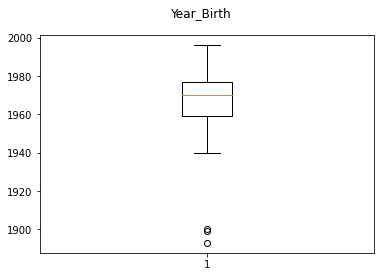

In [8]:
plt.suptitle("Year_Birth")
plt.boxplot(data["Year_Birth"])
plt.show()

2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
Name: Education, dtype: int64


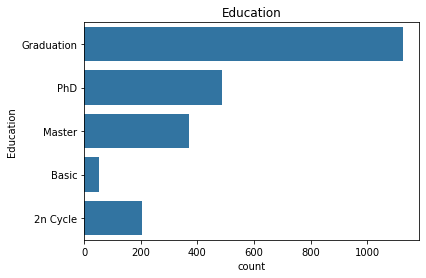

In [9]:
sns.countplot(data, y="Education").set(title="Education")
print(data['Education'].value_counts(dropna=False).sort_index())

Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
Name: Marital_Status, dtype: int64


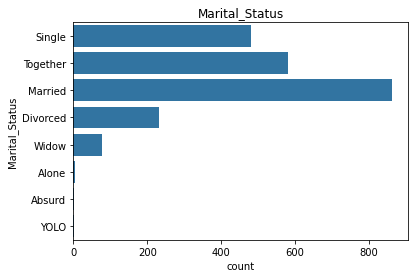

In [10]:
sns.countplot(data, y="Marital_Status").set(title="Marital_Status")
print(data['Marital_Status'].value_counts(dropna=False).sort_index())

1730.0       1
2447.0       1
3502.0       1
4023.0       1
4428.0       1
            ..
157733.0     1
160803.0     1
162397.0     1
666666.0     1
NaN         24
Name: Income, Length: 1975, dtype: int64


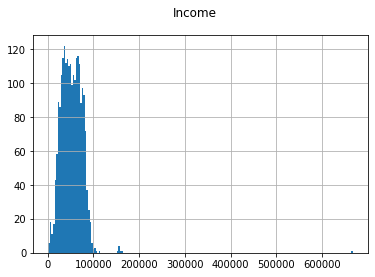

In [11]:
plt.suptitle("Income")
data["Income"].hist(bins=200)
print(data['Income'].value_counts(dropna=False).sort_index())
# Ova kolona je zapravo int, ali je prikazana kao float zbog NaN vrednosti

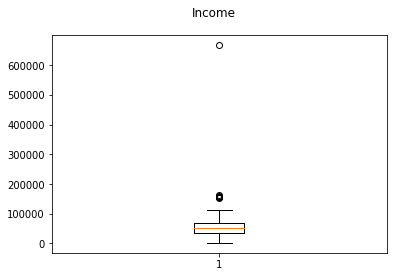

In [12]:
plt.suptitle("Income")
plt.boxplot(data["Income"].dropna(inplace=False))
plt.show()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64


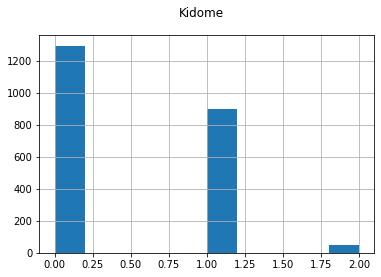

In [13]:
plt.suptitle("Kidome")
data["Kidhome"].hist()
print(data['Kidhome'].value_counts(dropna=False).sort_index())

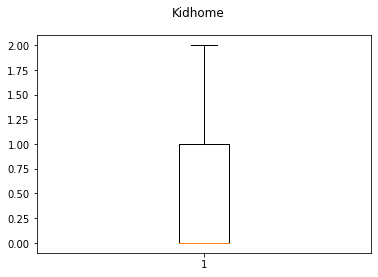

In [14]:
plt.suptitle("Kidhome")
plt.boxplot(data["Kidhome"].dropna(inplace=False))
plt.show()

0    1158
1    1030
2      52
Name: Teenhome, dtype: int64


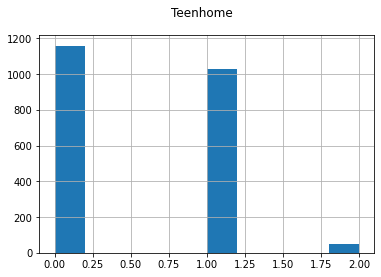

In [15]:
plt.suptitle("Teenhome")
data["Teenhome"].hist()
print(data['Teenhome'].value_counts(dropna=False).sort_index())

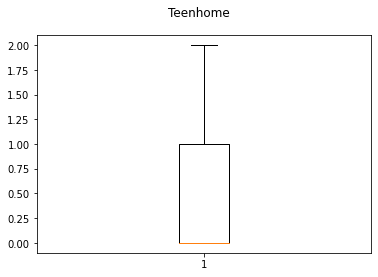

In [16]:
plt.suptitle("Teenhome")
plt.boxplot(data["Teenhome"].dropna(inplace=False))
plt.show()

Kolonu koja sadrži datume kreiranja profila kupaca pretvorićemo u dane od otvaranja, kako bi bili lakše uporedivi i kako bi taj podatak bio iskoristiv u daljoj analizi.

In [17]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"])
data["Dt_Customer"] = (pd.datetime.today() - data["Dt_Customer"]).dt.days

C:\PROGRA~1\KMSpico\temp/ipykernel_18020/824435045.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data["Dt_Customer"] = (pd.datetime.today() - data["Dt_Customer"]).dt.days


3356     1
3357    11
3358     2
3359     5
3360     3
        ..
4415     4
4416     2
4417     5
4418     1
4419     4
Name: Dt_Customer, Length: 663, dtype: int64


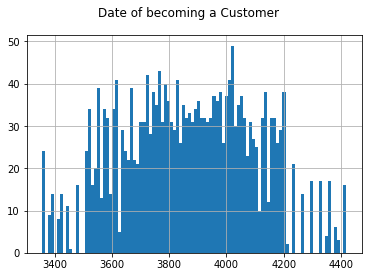

In [18]:
plt.suptitle("Date of becoming a Customer")
data["Dt_Customer"].hist(bins=100)
print(data['Dt_Customer'].value_counts(dropna=False).sort_index())

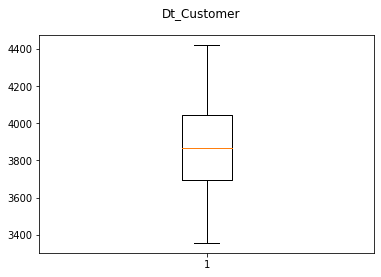

In [19]:
plt.suptitle("Dt_Customer")
plt.boxplot(data["Dt_Customer"].dropna(inplace=False))
plt.show()

0     28
1     24
2     28
3     29
4     27
      ..
95    19
96    25
97    20
98    22
99    17
Name: Recency, Length: 100, dtype: int64


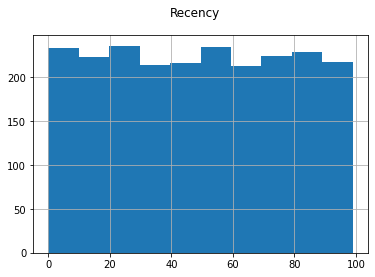

In [20]:
plt.suptitle("Recency")
data["Recency"].hist()
print(data['Recency'].value_counts(dropna=False).sort_index())

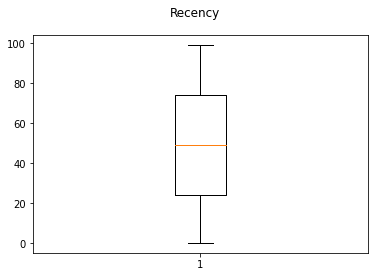

In [21]:
plt.suptitle("Recency")
plt.boxplot(data["Recency"].dropna(inplace=False))
plt.show()

Da bi podaci o vremenu provedenom na sajtu po kategorijama bili uporedivi, prvo sam izračunala ukupno vreme na sajtu, a vreme za svaku kategoriju predstavila sam kao procenat ukupnog vremena.

In [22]:
data["MntTotal"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

data["MntWines"] = data["MntWines"] / data["MntTotal"]
data["MntFruits"] = data["MntFruits"] / data["MntTotal"]
data["MntMeatProducts"] = data["MntMeatProducts"] / data["MntTotal"]
data["MntFishProducts"] = data["MntFishProducts"] / data["MntTotal"]
data["MntSweetProducts"] = data["MntSweetProducts"] / data["MntTotal"]
data["MntGoldProds"] = data["MntGoldProds"] / data["MntTotal"]

5       1
6       2
8       4
9       2
10      5
       ..
2352    1
2440    1
2486    1
2524    1
2525    2
Name: MntTotal, Length: 1054, dtype: int64


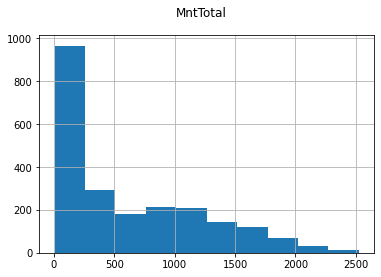

In [23]:
plt.suptitle("MntTotal")
data["MntTotal"].hist()
print(data['MntTotal'].value_counts(dropna=False).sort_index())

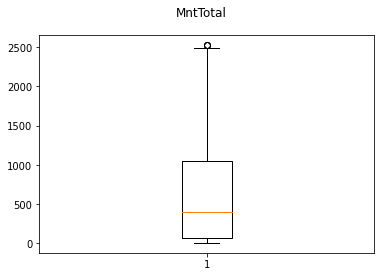

In [24]:
plt.suptitle("MntTotal")
plt.boxplot(data["MntTotal"].dropna(inplace=False))
plt.show()

0.000000    13
0.000578     2
0.007849     1
0.009346     1
0.009709     1
            ..
0.932937     2
0.933164     2
0.944186     1
0.952030     1
0.963303     1
Name: MntWines, Length: 1747, dtype: int64


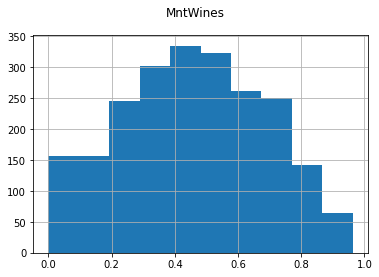

In [25]:
plt.suptitle("MntWines")
data["MntWines"].hist()
print(data['MntWines'].value_counts(dropna=False).sort_index())

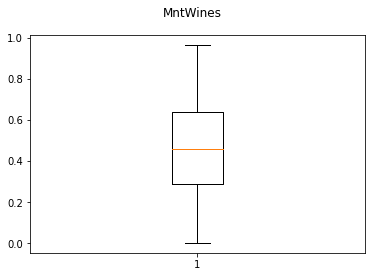

In [26]:
plt.suptitle("MntWines")
plt.boxplot(data["MntWines"].dropna(inplace=False))
plt.show()

0.000000    400
0.000578      1
0.001191      1
0.001244      1
0.001570      1
           ... 
0.306667      1
0.315789      1
0.333333      1
0.349515      1
0.445545      1
Name: MntFruits, Length: 1338, dtype: int64


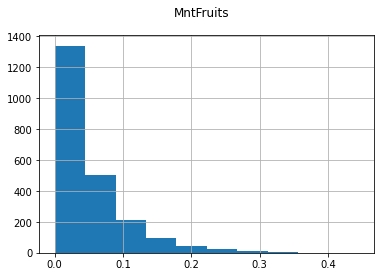

In [27]:
plt.suptitle("MntFruits")
data["MntFruits"].hist()
print(data['MntFruits'].value_counts(dropna=False).sort_index())

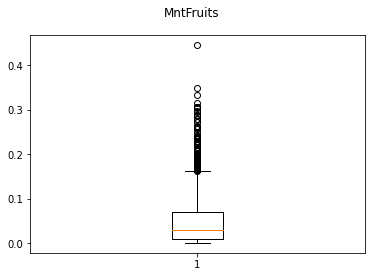

In [28]:
plt.suptitle("MntFruits")
plt.boxplot(data["MntFruits"].dropna(inplace=False))
plt.show()

0.000000    1
0.004710    1
0.010830    1
0.019417    1
0.025751    1
           ..
0.749084    1
0.944671    1
0.957117    1
0.983831    1
0.997110    2
Name: MntMeatProducts, Length: 1650, dtype: int64


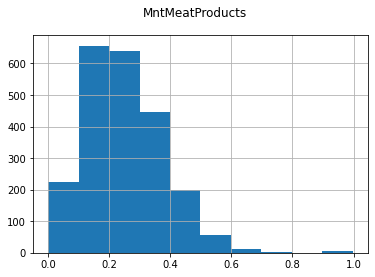

In [29]:
plt.suptitle("MntMeatProducts")
data["MntMeatProducts"].hist()
print(data['MntMeatProducts'].value_counts(dropna=False).sort_index())

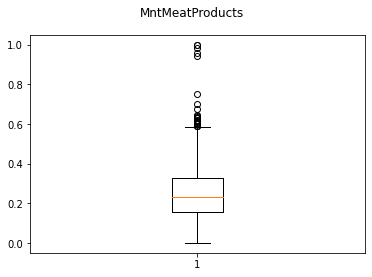

In [30]:
plt.suptitle("MntMeatProducts")
plt.boxplot(data["MntMeatProducts"].dropna(inplace=False))
plt.show()

0.000000    384
0.000578      1
0.000622      1
0.001156      1
0.003610      1
           ... 
0.473186      2
0.554054      1
0.571429      1
0.576923      1
0.590909      1
Name: MntFishProducts, Length: 1371, dtype: int64


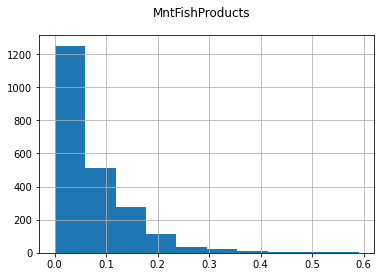

In [31]:
plt.suptitle("MntFishProducts")
data["MntFishProducts"].hist()
print(data['MntFishProducts'].value_counts(dropna=False).sort_index())

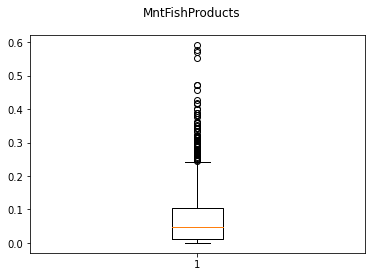

In [32]:
plt.suptitle("MntFishProducts")
plt.boxplot(data["MntFishProducts"].dropna(inplace=False))
plt.show()

0.000000    419
0.000578      2
0.001244      1
0.001747      1
0.002382      1
           ... 
0.375000      1
0.412873      1
0.458333      1
0.600000      1
0.945848      1
Name: MntSweetProducts, Length: 1308, dtype: int64


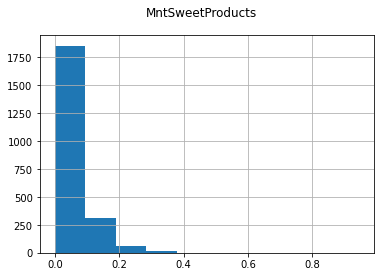

In [33]:
plt.suptitle("MntSweetProducts")
data["MntSweetProducts"].hist()
print(data['MntSweetProducts'].value_counts(dropna=False).sort_index())

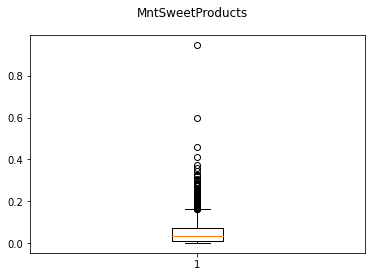

In [34]:
plt.suptitle("MntSweetProducts")
plt.boxplot(data["MntSweetProducts"].dropna(inplace=False))
plt.show()

0.000000    61
0.000578     2
0.000622     1
0.002330     1
0.005464     1
            ..
0.500000     2
0.568289     1
0.699519     1
0.702413     1
0.894150     1
Name: MntGoldProds, Length: 1577, dtype: int64


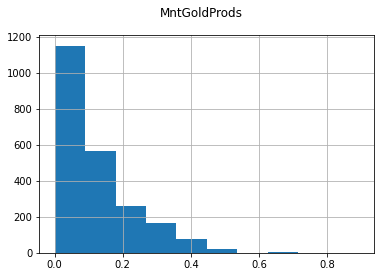

In [35]:
plt.suptitle("MntGoldProds")
data["MntGoldProds"].hist()
print(data['MntGoldProds'].value_counts(dropna=False).sort_index())

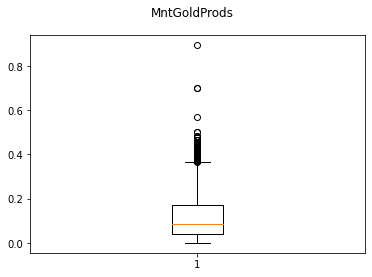

In [36]:
plt.suptitle("MntGoldProds")
plt.boxplot(data["MntGoldProds"].dropna(inplace=False))
plt.show()

0      46
1     970
2     497
3     297
4     189
5      94
6      61
7      40
8      14
9       8
10      5
11      5
12      4
13      3
15      7
Name: NumDealsPurchases, dtype: int64


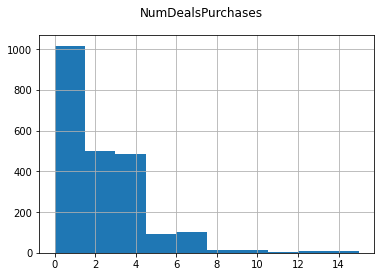

In [37]:
plt.suptitle("NumDealsPurchases")
data["NumDealsPurchases"].hist()
print(data['NumDealsPurchases'].value_counts(dropna=False).sort_index())

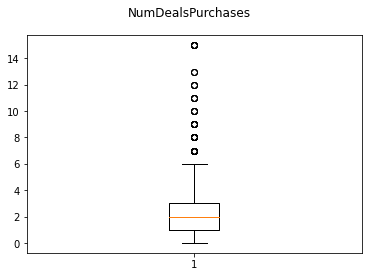

In [38]:
plt.suptitle("NumDealsPurchases")
plt.boxplot(data["NumDealsPurchases"].dropna(inplace=False))
plt.show()

0      49
1     354
2     373
3     336
4     280
5     220
6     205
7     155
8     102
9      75
10     43
11     44
23      1
25      1
27      2
Name: NumWebPurchases, dtype: int64


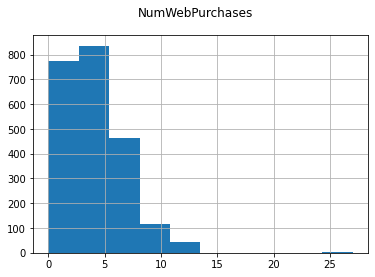

In [39]:
plt.suptitle("NumWebPurchases")
data["NumWebPurchases"].hist()
print(data['NumWebPurchases'].value_counts(dropna=False).sort_index())

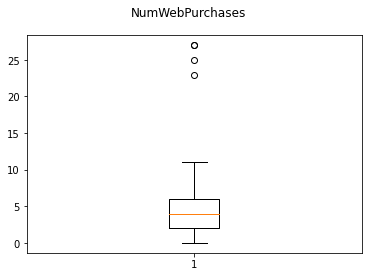

In [40]:
plt.suptitle("NumWebPurchases")
plt.boxplot(data["NumWebPurchases"].dropna(inplace=False))
plt.show()

0     586
1     497
2     276
3     184
4     182
5     140
6     128
7      79
8      55
9      42
10     48
11     19
22      1
28      3
Name: NumCatalogPurchases, dtype: int64


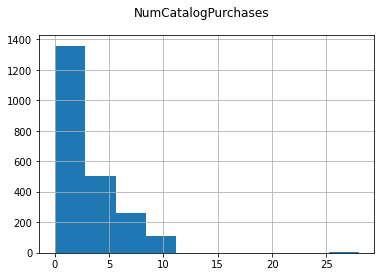

In [41]:
plt.suptitle("NumCatalogPurchases")
data["NumCatalogPurchases"].hist()
print(data['NumCatalogPurchases'].value_counts(dropna=False).sort_index())

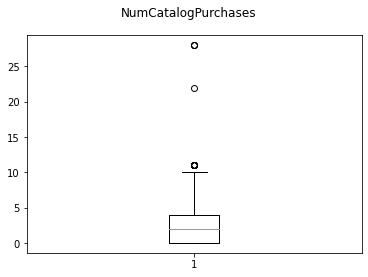

In [42]:
plt.suptitle("NumCatalogPurchases")
plt.boxplot(data["NumCatalogPurchases"].dropna(inplace=False))
plt.show()

0      15
1       7
2     223
3     490
4     323
5     212
6     178
7     143
8     149
9     106
10    125
11     81
12    105
13     83
Name: NumStorePurchases, dtype: int64


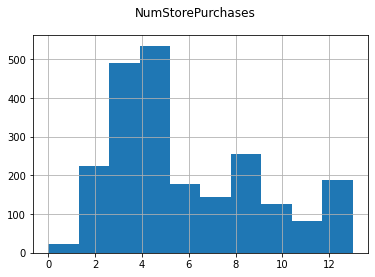

In [43]:
plt.suptitle("NumStorePurchases")
data["NumStorePurchases"].hist()
print(data['NumStorePurchases'].value_counts(dropna=False).sort_index())

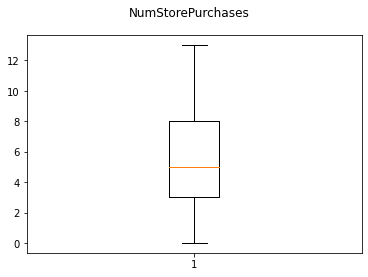

In [44]:
plt.suptitle("NumStorePurchases")
plt.boxplot(data["NumStorePurchases"].dropna(inplace=False))
plt.show()

0      11
1     153
2     202
3     205
4     218
5     281
6     340
7     393
8     342
9      83
10      3
13      1
14      2
17      1
19      2
20      3
Name: NumWebVisitsMonth, dtype: int64


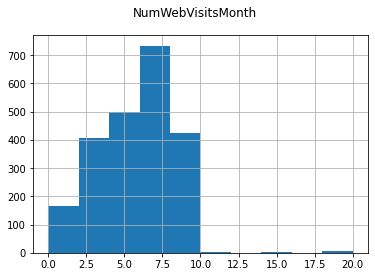

In [45]:
plt.suptitle("NumWebVisitsMonth")
data["NumWebVisitsMonth"].hist()
print(data['NumWebVisitsMonth'].value_counts(dropna=False).sort_index())

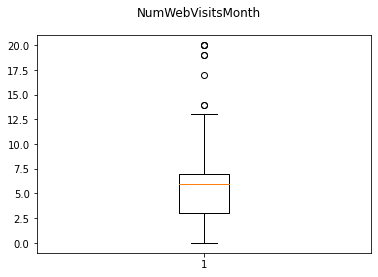

In [46]:
plt.suptitle("NumWebVisitsMonth")
plt.boxplot(data["NumWebVisitsMonth"].dropna(inplace=False))
plt.show()

0    2096
1     144
Name: AcceptedCmp1, dtype: int64


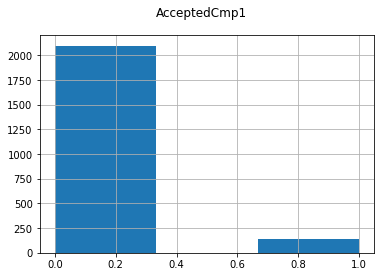

In [47]:
plt.suptitle("AcceptedCmp1")
data["AcceptedCmp1"].hist(bins=3)
print(data['AcceptedCmp1'].value_counts(dropna=False).sort_index())

0    2210
1      30
Name: AcceptedCmp2, dtype: int64


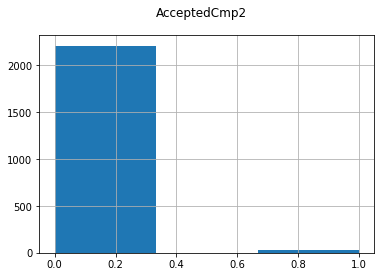

In [48]:
plt.suptitle("AcceptedCmp2")
data["AcceptedCmp2"].hist(bins=3)
print(data['AcceptedCmp2'].value_counts(dropna=False).sort_index())

0    2077
1     163
Name: AcceptedCmp3, dtype: int64


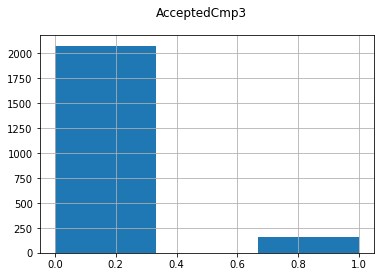

In [49]:
plt.suptitle("AcceptedCmp3")
data["AcceptedCmp3"].hist(bins=3)
print(data['AcceptedCmp3'].value_counts(dropna=False).sort_index())

0    2073
1     167
Name: AcceptedCmp4, dtype: int64


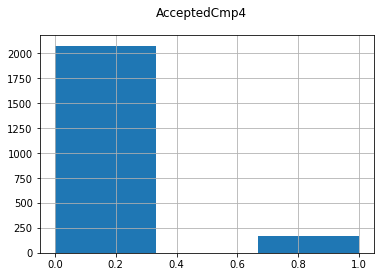

In [50]:
plt.suptitle("AcceptedCmp4")
data["AcceptedCmp4"].hist(bins=3)
print(data['AcceptedCmp4'].value_counts(dropna=False).sort_index())

0    2077
1     163
Name: AcceptedCmp5, dtype: int64


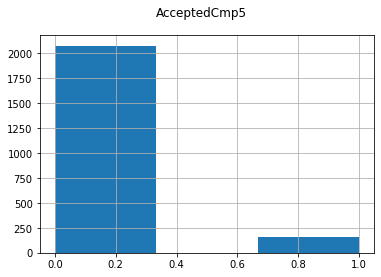

In [51]:
plt.suptitle("AcceptedCmp5")
data["AcceptedCmp5"].hist(bins=3)
print(data['AcceptedCmp5'].value_counts(dropna=False).sort_index())

0    2219
1      21
Name: Complain, dtype: int64


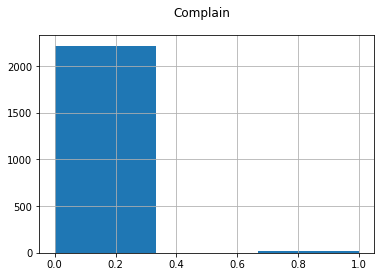

In [52]:
plt.suptitle("Complain")
data["Complain"].hist(bins=3)
print(data['Complain'].value_counts(dropna=False).sort_index())

0    1906
1     334
Name: Response, dtype: int64


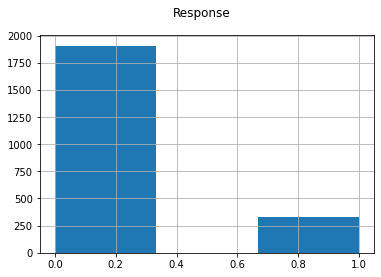

In [53]:
plt.suptitle("Response")
data["Response"].hist(bins=3)
print(data['Response'].value_counts(dropna=False).sort_index())

## Dopuna nedostajućih vrednosti, izbacivanje duplikata, sređivanje raspodela i outlier-a

Prvo proveravamo koje kolone imaju nedostajuće vrednosti:

In [54]:
print(data.isnull().any())

Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
MntTotal               False
dtype: bool


Samo kolona "Income", koja je numerička, ima nedostajuće vrednosti. Za sada, zbog malog broja vrsta u kojima ova vrednost nedostaje, ove vrednosti popunjene su srednjom vrednošću ovog podatka:

<AxesSubplot: >

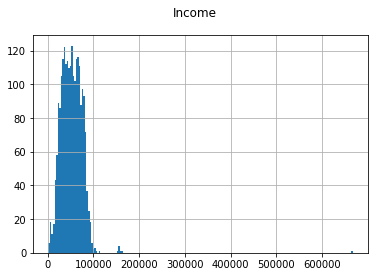

In [55]:
data["Income"].fillna(np.round(data["Income"].mean()), inplace=True)
plt.suptitle("Income")
data["Income"].hist(bins=200)

Sada ćemo izbaciti duplikate iz podataka:

In [56]:
data.drop_duplicates(inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2058 non-null   int64  
 1   Education            2058 non-null   object 
 2   Marital_Status       2058 non-null   object 
 3   Income               2058 non-null   float64
 4   Kidhome              2058 non-null   int64  
 5   Teenhome             2058 non-null   int64  
 6   Dt_Customer          2058 non-null   int64  
 7   Recency              2058 non-null   int64  
 8   MntWines             2058 non-null   float64
 9   MntFruits            2058 non-null   float64
 10  MntMeatProducts      2058 non-null   float64
 11  MntFishProducts      2058 non-null   float64
 12  MntSweetProducts     2058 non-null   float64
 13  MntGoldProds         2058 non-null   float64
 14  NumDealsPurchases    2058 non-null   int64  
 15  NumWebPurchases      2058 non-null   i

Sada, proverićemo koliko korisnika ima zaradu preko 120K kako bismo odlučili da li je bezbedno izbaciti outlier-e. Podatke bez outlier-a ćemo čuvati u posebnom dataset-u kako bismo posle ispitivali ponašanje nekih clustering alogitama sa i bez outlier-a.

In [57]:
print((data["Income"] > 120000).sum())

8


Ove podatke ćemo izbaciti, jer predstavljaju outlier-e.

<AxesSubplot: >

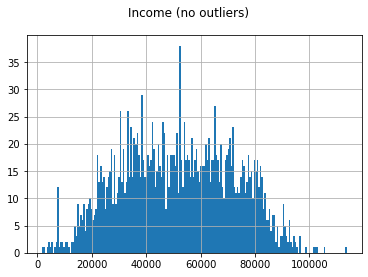

In [58]:
data_no_outliers = data[data["Income"] < 120000]
plt.suptitle("Income (no outliers)")
data_no_outliers["Income"].hist(bins=200)

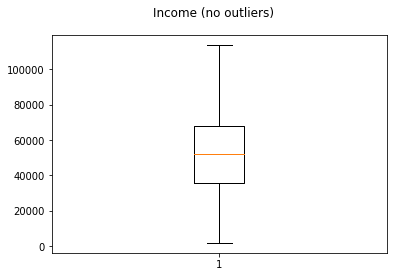

In [59]:
plt.suptitle("Income (no outliers)")
plt.boxplot(data_no_outliers["Income"])
plt.show()

Kod kolone "Year_Birth", imali smo 3 očigledna outlier-a: osobe rođene do $1900.$ godine. I ove podatke izbacujemo iz dataseta. 1

In [60]:
data_no_outliers = data_no_outliers[data_no_outliers["Year_Birth"] > 1900]

<AxesSubplot: >

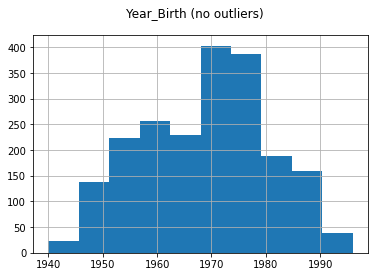

In [61]:
plt.suptitle("Year_Birth (no outliers)")
data_no_outliers["Year_Birth"].hist()

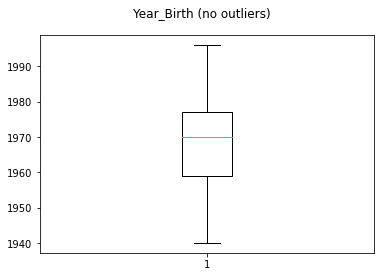

In [62]:
plt.suptitle("Year_Birth (no outliers)")
plt.boxplot(data_no_outliers["Year_Birth"])
plt.show()

U koloni "Marital_Status", očigledni outlier-i su vrednosti "YOLO" i "Absurd". Pošto ima malo ovakvih podataka (ukupno 4), ove podatke ćemo odbaciti. Vrednost "Alone" ćemo pripojiti vrednosti "Single".

In [63]:
data_no_outliers = data_no_outliers[data_no_outliers["Marital_Status"] != "YOLO"]
data_no_outliers = data_no_outliers[data_no_outliers["Marital_Status"] != "Absurd"]
data_no_outliers["Marital_Status"][data_no_outliers["Marital_Status"] == "Alone"] = "Single"

Divorced    214
Married     792
Single      450
Together    516
Widow        71
Name: Marital_Status, dtype: int64


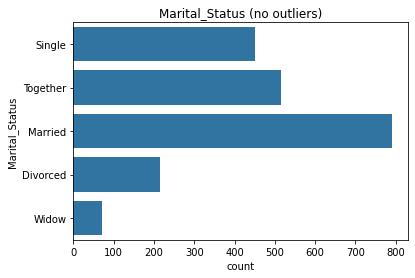

In [64]:
sns.countplot(data_no_outliers, y="Marital_Status").set(title="Marital_Status (no outliers)")
print(data_no_outliers['Marital_Status'].value_counts(dropna=False).sort_index())

Iako je pri prikazivanju kolona "MntTotal" i drugih kolona koje predstavljaju minute bilo outlier-a, proverom njihovih vrednosti vidi se da te vrednosti nisu značajno izvan granica normale, i da nema potrebe izbacivati ih.

Kolonu "NumDealsPurchases" diskretizovaćemo na one koji su kupili do 3 (gornja granica za interquartile range) i preko 3. Ovo ćemo uraditi u oba dataset-a:

In [65]:
data["NumDealsPurchases"] = (data["NumDealsPurchases"] > 3).astype(np.uint8)
data_no_outliers["NumDealsPurchases"] = (data_no_outliers["NumDealsPurchases"] > 3).astype(np.uint8)

0    1658
1     400
Name: NumDealsPurchases, dtype: int64


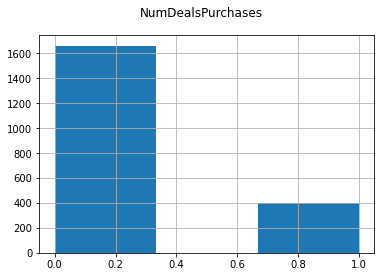

0    1648
1     395
Name: NumDealsPurchases, dtype: int64


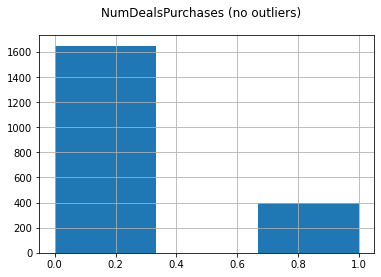

In [66]:
plt.suptitle("NumDealsPurchases")
data["NumDealsPurchases"].hist(bins=3)
print(data['NumDealsPurchases'].value_counts(dropna=False).sort_index())
plt.show()

plt.suptitle("NumDealsPurchases (no outliers)")
data_no_outliers["NumDealsPurchases"].hist(bins=3)
print(data_no_outliers['NumDealsPurchases'].value_counts(dropna=False).sort_index())

Sličan postupak ponovićemo i sa kolonama "NumWebPurchases", "NumCatalogPurchases" i "NumWebVisitsMonth":

In [67]:
data["NumWebPurchases"] = (data["NumWebPurchases"] > 7).astype(np.uint8)
data_no_outliers["NumWebPurchases"] = (data_no_outliers["NumWebPurchases"] > 7).astype(np.uint8)

0    1811
1     247
Name: NumWebPurchases, dtype: int64


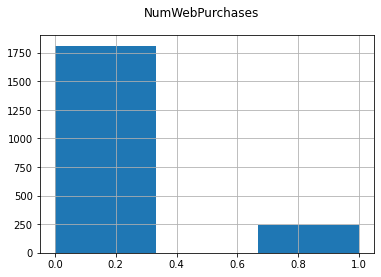

0    1796
1     247
Name: NumWebPurchases, dtype: int64


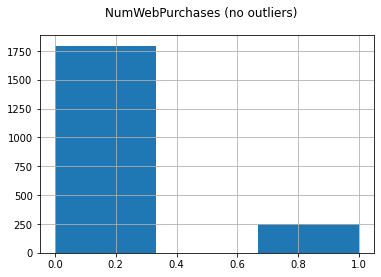

In [68]:
plt.suptitle("NumWebPurchases")
data["NumWebPurchases"].hist(bins=3)
print(data['NumWebPurchases'].value_counts(dropna=False).sort_index())
plt.show()

plt.suptitle("NumWebPurchases (no outliers)")
data_no_outliers["NumWebPurchases"].hist(bins=3)
print(data_no_outliers['NumWebPurchases'].value_counts(dropna=False).sort_index())

In [69]:
data["NumCatalogPurchases"] = (data["NumCatalogPurchases"] > 4).astype(np.uint8)
data_no_outliers["NumCatalogPurchases"] = (data_no_outliers["NumCatalogPurchases"] > 4).astype(np.uint8)

0    1591
1     467
Name: NumCatalogPurchases, dtype: int64


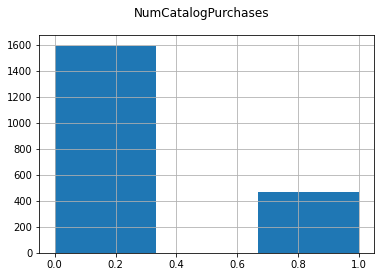

0    1582
1     461
Name: NumCatalogPurchases, dtype: int64


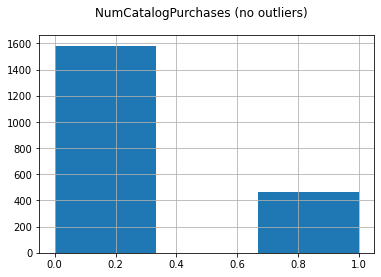

In [70]:
plt.suptitle("NumCatalogPurchases")
data["NumCatalogPurchases"].hist(bins=3)
print(data['NumCatalogPurchases'].value_counts(dropna=False).sort_index())
plt.show()

plt.suptitle("NumCatalogPurchases (no outliers)")
data_no_outliers["NumCatalogPurchases"].hist(bins=3)
print(data_no_outliers['NumCatalogPurchases'].value_counts(dropna=False).sort_index())

In [71]:
data["NumWebVisitsMonth"] = (data["NumWebVisitsMonth"] > 7).astype(np.uint8)
data_no_outliers["NumWebVisitsMonth"] = (data_no_outliers["NumWebVisitsMonth"] > 7).astype(np.uint8)

0    1656
1     402
Name: NumWebVisitsMonth, dtype: int64


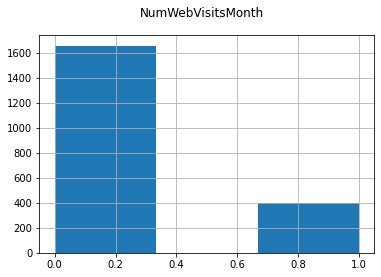

0    1643
1     400
Name: NumWebVisitsMonth, dtype: int64


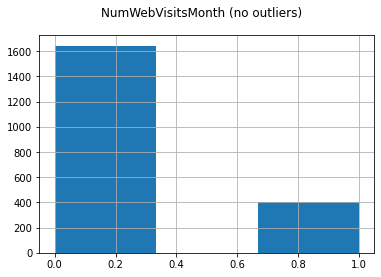

In [72]:
plt.suptitle("NumWebVisitsMonth")
data["NumWebVisitsMonth"].hist(bins=3)
print(data['NumWebVisitsMonth'].value_counts(dropna=False).sort_index())
plt.show()

plt.suptitle("NumWebVisitsMonth (no outliers)")
data_no_outliers["NumWebVisitsMonth"].hist(bins=3)
print(data_no_outliers['NumWebVisitsMonth'].value_counts(dropna=False).sort_index())

Zbog malog broja pozitivnih vrednosti u svakod od kolona koje počinju sa "AcceptedCmp", te kolone će biti spojene u jednu, binarnu kolonu, u kojoj će 1 značiti da je korisnik prihvatio neku od kampanja, a 0 da nije prihvatio ni jednu.

0    1627
1     431
Name: AcceptedCmp, dtype: int64


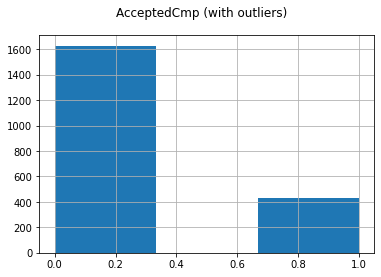

In [73]:
data["AcceptedCmp"] = data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]
data["AcceptedCmp"] = [1 if x>=1 else 0 for x in data["AcceptedCmp"]]
data.drop(["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"], axis="columns", inplace=True)

plt.suptitle("AcceptedCmp (with outliers)")
data["AcceptedCmp"].hist(bins=3)
print(data['AcceptedCmp'].value_counts(dropna=False).sort_index())

0    1614
1     429
Name: AcceptedCmp, dtype: int64


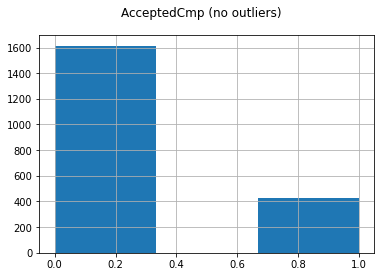

In [74]:
data_no_outliers["AcceptedCmp"] = data_no_outliers["AcceptedCmp1"] + data_no_outliers["AcceptedCmp2"] + data_no_outliers["AcceptedCmp3"] + data_no_outliers["AcceptedCmp4"] + data_no_outliers["AcceptedCmp5"]
data_no_outliers["AcceptedCmp"] = [1 if x>=1 else 0 for x in data_no_outliers["AcceptedCmp"]]
data_no_outliers.drop(["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"], axis="columns", inplace=True)

plt.suptitle("AcceptedCmp (no outliers)")
data_no_outliers["AcceptedCmp"].hist(bins=3)
print(data_no_outliers['AcceptedCmp'].value_counts(dropna=False).sort_index())

Ovde ćemo iskoristiti priliku da sačuvamo podatke pre transformacije, kako bismo kasnije vršili analizu na originalnim podacima.

In [75]:
original_data = data.copy()
original_data_no_outliers = data_no_outliers.copy()

Sledeći korak jeste da se pozabavimo distribucijama podataka koje nisu normalne:

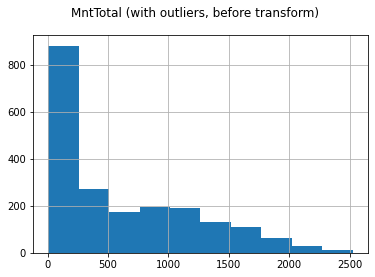

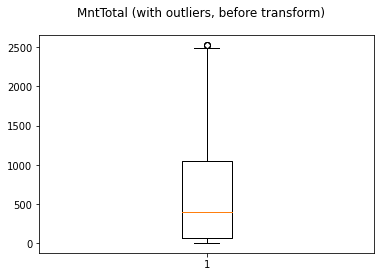

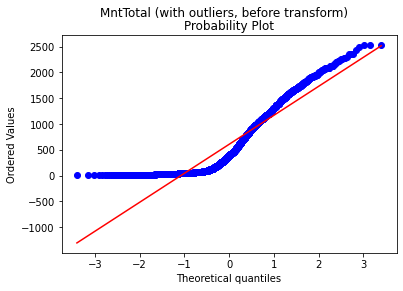

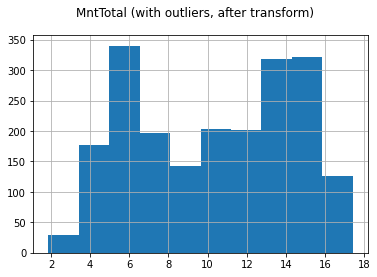

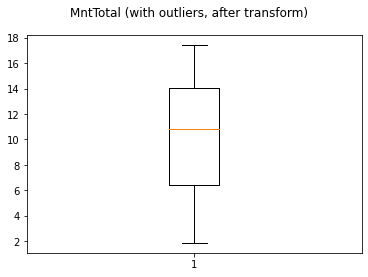

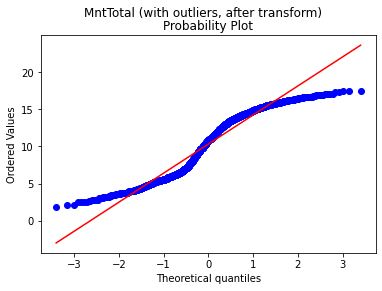

In [76]:
plt.suptitle("MntTotal (with outliers, before transform)")
data["MntTotal"].hist()
plt.show()

plt.suptitle("MntTotal (with outliers, before transform)")
plt.boxplot(data["MntTotal"].dropna(inplace=False))
plt.show()

plt.suptitle("MntTotal (with outliers, before transform)")
stats.probplot(data["MntTotal"], plot=pylab)
plt.show()

data["MntTotal"], _ = boxcox(data["MntTotal"])

plt.suptitle("MntTotal (with outliers, after transform)")
data["MntTotal"].hist()
plt.show()

plt.suptitle("MntTotal (with outliers, after transform)")
plt.boxplot(data["MntTotal"].dropna(inplace=False))
plt.show()

plt.suptitle("MntTotal (with outliers, after transform)")
stats.probplot(data["MntTotal"], plot=pylab)
plt.show()

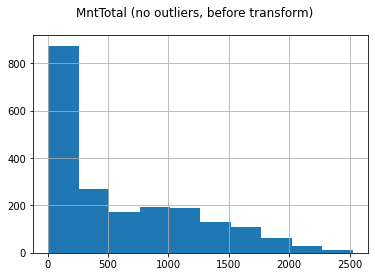

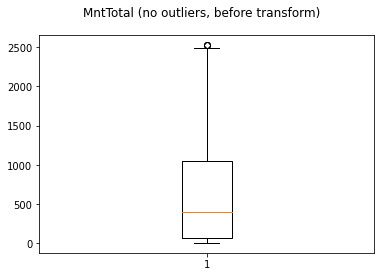

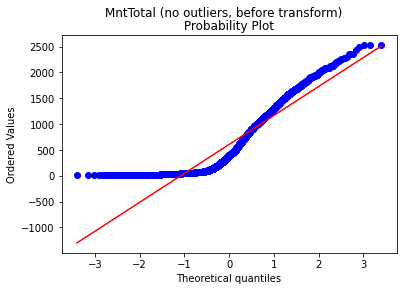

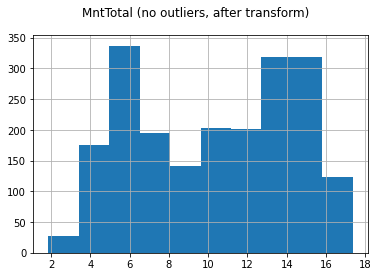

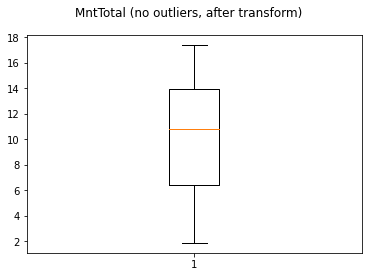

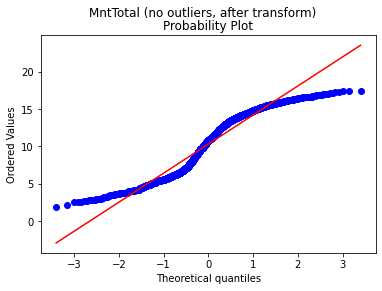

In [77]:
plt.suptitle("MntTotal (no outliers, before transform)")
data_no_outliers["MntTotal"].hist()
plt.show()

plt.suptitle("MntTotal (no outliers, before transform)")
plt.boxplot(data_no_outliers["MntTotal"].dropna(inplace=False))
plt.show()

plt.suptitle("MntTotal (no outliers, before transform)")
stats.probplot(data_no_outliers["MntTotal"], plot=pylab)
plt.show()

data_no_outliers["MntTotal"], _ = boxcox(data_no_outliers["MntTotal"])

plt.suptitle("MntTotal (no outliers, after transform)")
data_no_outliers["MntTotal"].hist()
plt.show()

plt.suptitle("MntTotal (no outliers, after transform)")
plt.boxplot(data_no_outliers["MntTotal"].dropna(inplace=False))
plt.show()

plt.suptitle("MntTotal (no outliers, after transform)")
stats.probplot(data_no_outliers["MntTotal"], plot=pylab)
plt.show()

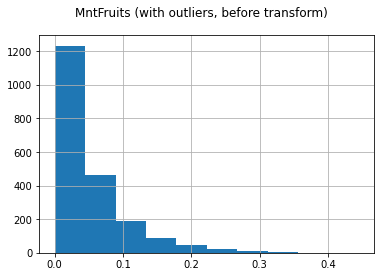

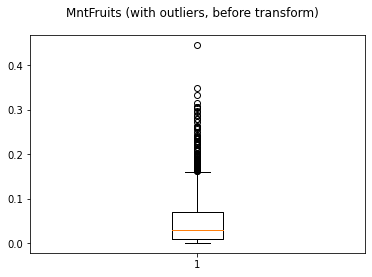

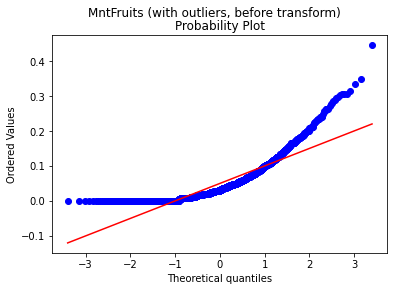

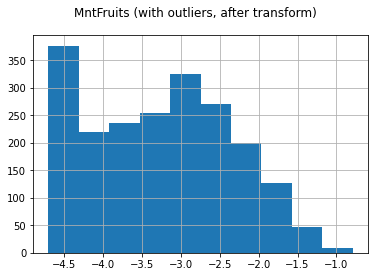

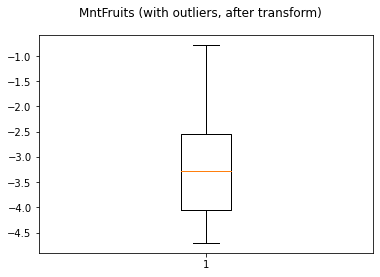

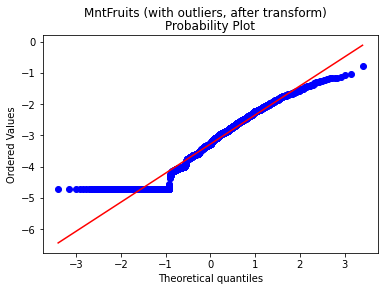

In [78]:
plt.suptitle("MntFruits (with outliers, before transform)")
data["MntFruits"].hist()
plt.show()

plt.suptitle("MntFruits (with outliers, before transform)")
plt.boxplot(data["MntFruits"].dropna(inplace=False))
plt.show()

plt.suptitle("MntFruits (with outliers, before transform)")
stats.probplot(data["MntFruits"], plot=pylab)
plt.show()

data["MntFruits"] += 0.01
data["MntFruits"], _ = boxcox(data["MntFruits"])

plt.suptitle("MntFruits (with outliers, after transform)")
data["MntFruits"].hist()
plt.show()

plt.suptitle("MntFruits (with outliers, after transform)")
plt.boxplot(data["MntFruits"].dropna(inplace=False))
plt.show()

plt.suptitle("MntFruits (with outliers, after transform)")
stats.probplot(data["MntFruits"], plot=pylab)
plt.show()

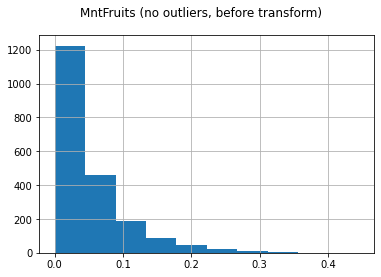

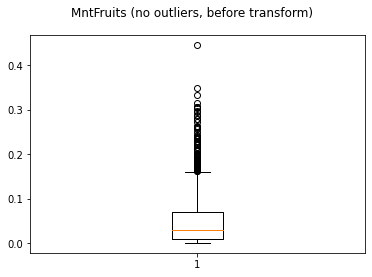

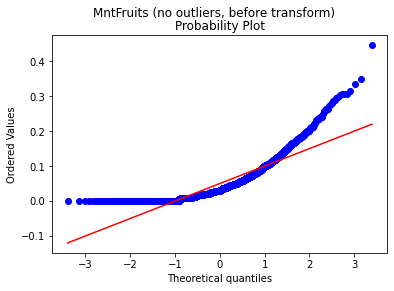

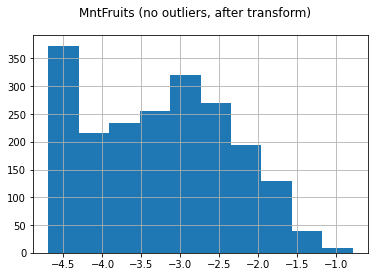

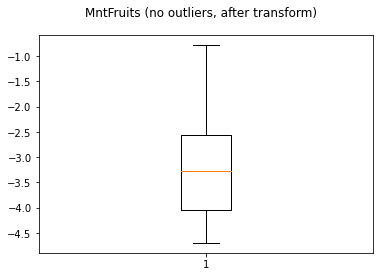

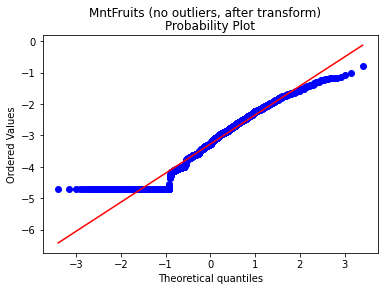

In [79]:
plt.suptitle("MntFruits (no outliers, before transform)")
data_no_outliers["MntFruits"].hist()
plt.show()

plt.suptitle("MntFruits (no outliers, before transform)")
plt.boxplot(data_no_outliers["MntFruits"].dropna(inplace=False))
plt.show()

plt.suptitle("MntFruits (no outliers, before transform)")
stats.probplot(data_no_outliers["MntFruits"], plot=pylab)
plt.show()

data_no_outliers["MntFruits"] += 0.01
data_no_outliers["MntFruits"], _ = boxcox(data_no_outliers["MntFruits"])

plt.suptitle("MntFruits (no outliers, after transform)")
data_no_outliers["MntFruits"].hist()
plt.show()

plt.suptitle("MntFruits (no outliers, after transform)")
plt.boxplot(data_no_outliers["MntFruits"].dropna(inplace=False))
plt.show()

plt.suptitle("MntFruits (no outliers, after transform)")
stats.probplot(data_no_outliers["MntFruits"], plot=pylab)
plt.show()

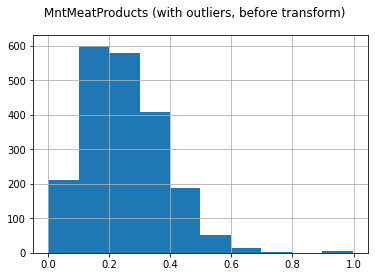

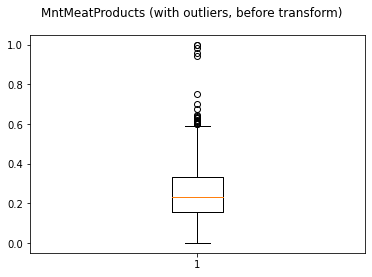

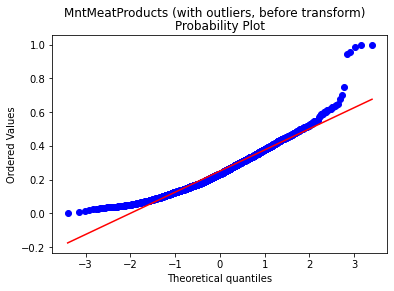

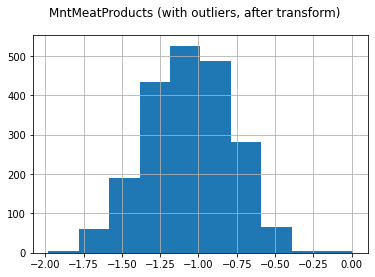

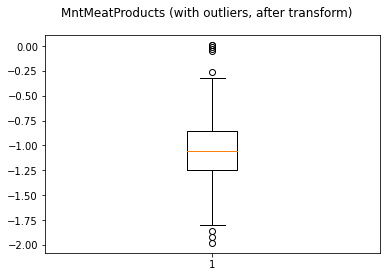

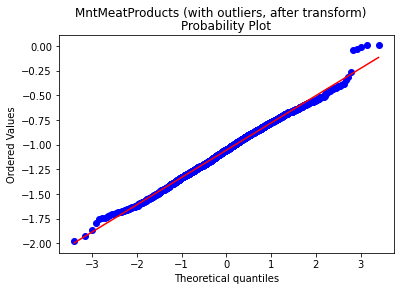

In [80]:
plt.suptitle("MntMeatProducts (with outliers, before transform)")
data["MntMeatProducts"].hist()
plt.show()

plt.suptitle("MntMeatProducts (with outliers, before transform)")
plt.boxplot(data["MntMeatProducts"].dropna(inplace=False))
plt.show()

plt.suptitle("MntMeatProducts (with outliers, before transform)")
stats.probplot(data["MntMeatProducts"], plot=pylab)
plt.show()

data["MntMeatProducts"] += 0.01
data["MntMeatProducts"], _ = boxcox(data["MntMeatProducts"])

plt.suptitle("MntMeatProducts (with outliers, after transform)")
data["MntMeatProducts"].hist()
plt.show()

plt.suptitle("MntMeatProducts (with outliers, after transform)")
plt.boxplot(data["MntMeatProducts"].dropna(inplace=False))
plt.show()

plt.suptitle("MntMeatProducts (with outliers, after transform)")
stats.probplot(data["MntMeatProducts"], plot=pylab)
plt.show()

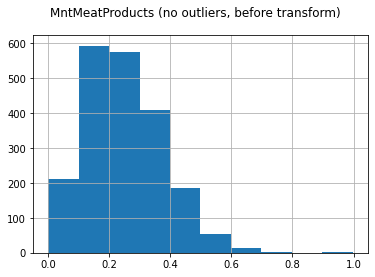

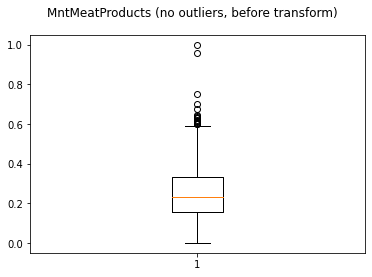

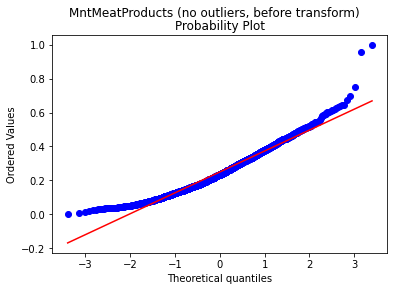

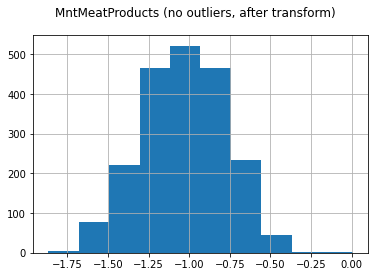

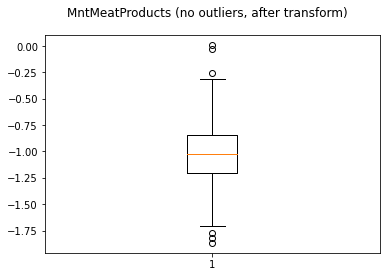

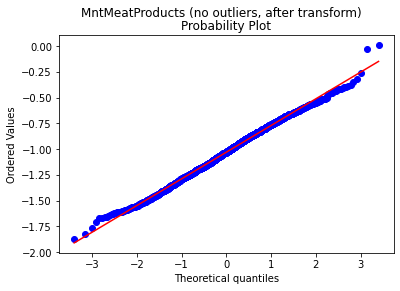

In [81]:
plt.suptitle("MntMeatProducts (no outliers, before transform)")
data_no_outliers["MntMeatProducts"].hist()
plt.show()

plt.suptitle("MntMeatProducts (no outliers, before transform)")
plt.boxplot(data_no_outliers["MntMeatProducts"].dropna(inplace=False))
plt.show()

plt.suptitle("MntMeatProducts (no outliers, before transform)")
stats.probplot(data_no_outliers["MntMeatProducts"], plot=pylab)
plt.show()

data_no_outliers["MntMeatProducts"] += 0.01
data_no_outliers["MntMeatProducts"], _ = boxcox(data_no_outliers["MntMeatProducts"])

plt.suptitle("MntMeatProducts (no outliers, after transform)")
data_no_outliers["MntMeatProducts"].hist()
plt.show()

plt.suptitle("MntMeatProducts (no outliers, after transform)")
plt.boxplot(data_no_outliers["MntMeatProducts"].dropna(inplace=False))
plt.show()

plt.suptitle("MntMeatProducts (no outliers, after transform)")
stats.probplot(data_no_outliers["MntMeatProducts"], plot=pylab)
plt.show()

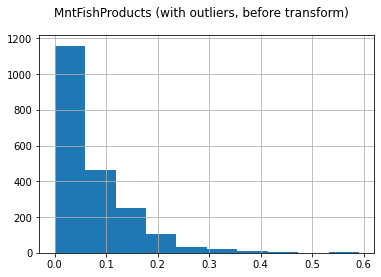

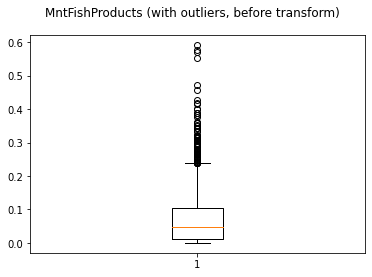

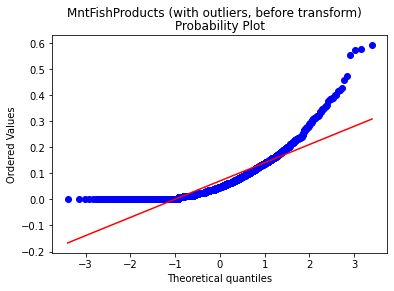

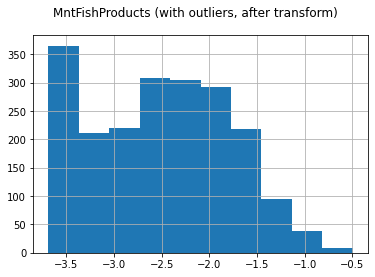

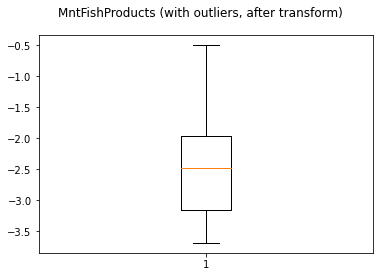

((array([-3.40014593, -3.14962659, -3.01070288, ...,  3.01070288,
          3.14962659,  3.40014593]),
  array([-3.68852267, -3.68852267, -3.68852267, ..., -0.52779225,
         -0.51888003, -0.49652869])),
 (0.7378556709189485, -2.535487926296207, 0.9781731207541067))

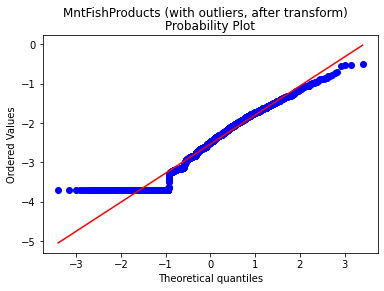

In [82]:
plt.suptitle("MntFishProducts (with outliers, before transform)")
data["MntFishProducts"].hist()
plt.show()

plt.suptitle("MntFishProducts (with outliers, before transform)")
plt.boxplot(data["MntFishProducts"].dropna(inplace=False))
plt.show()

plt.suptitle("MntFishProducts (with outliers, before transform)")
stats.probplot(data["MntFishProducts"], plot=pylab)
plt.show()

data["MntFishProducts"] += 0.01
data["MntFishProducts"], _ = boxcox(data["MntFishProducts"])

plt.suptitle("MntFishProducts (with outliers, after transform)")
data["MntFishProducts"].hist()
plt.show()

plt.suptitle("MntFishProducts (with outliers, after transform)")
plt.boxplot(data["MntFishProducts"].dropna(inplace=False))
plt.show()

plt.suptitle("MntFishProducts (with outliers, after transform)")
stats.probplot(data["MntFishProducts"], plot=pylab)

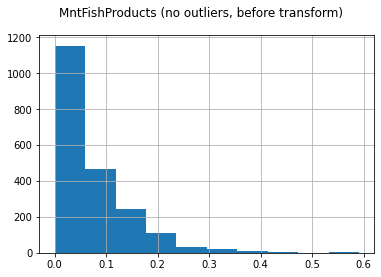

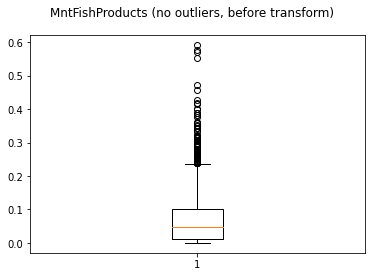

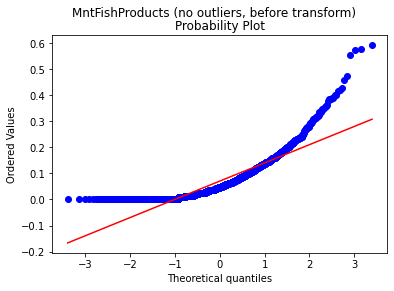

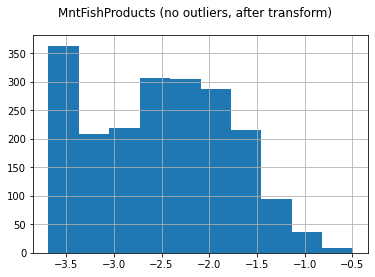

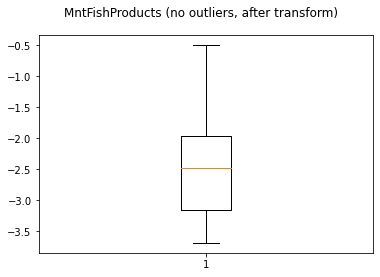

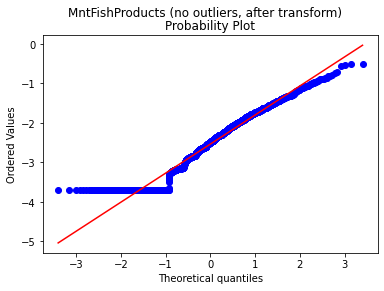

In [83]:
plt.suptitle("MntFishProducts (no outliers, before transform)")
data_no_outliers["MntFishProducts"].hist()
plt.show()

plt.suptitle("MntFishProducts (no outliers, before transform)")
plt.boxplot(data_no_outliers["MntFishProducts"].dropna(inplace=False))
plt.show()

plt.suptitle("MntFishProducts (no outliers, before transform)")
stats.probplot(data_no_outliers["MntFishProducts"], plot=pylab)
plt.show()

data_no_outliers["MntFishProducts"] += 0.01
data_no_outliers["MntFishProducts"], _ = boxcox(data_no_outliers["MntFishProducts"])

plt.suptitle("MntFishProducts (no outliers, after transform)")
data_no_outliers["MntFishProducts"].hist()
plt.show()

plt.suptitle("MntFishProducts (no outliers, after transform)")
plt.boxplot(data_no_outliers["MntFishProducts"].dropna(inplace=False))
plt.show()

plt.suptitle("MntFishProducts (no outliers, after transform)")
stats.probplot(data_no_outliers["MntFishProducts"], plot=pylab)
plt.show()

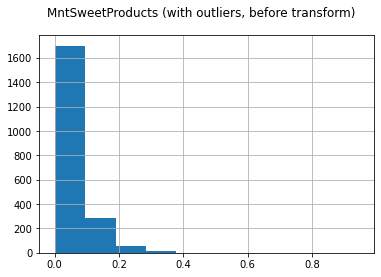

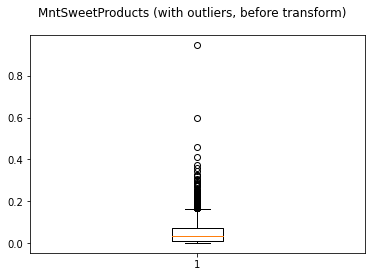

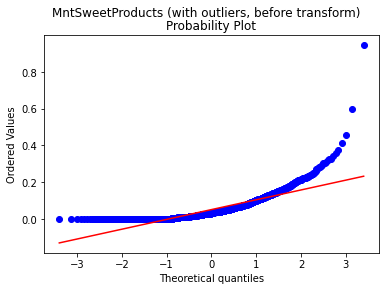

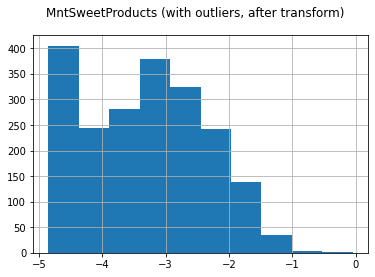

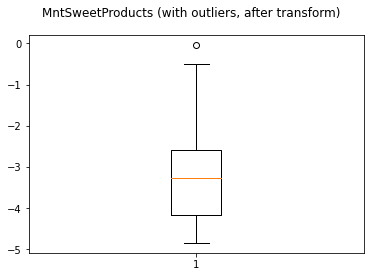

((array([-3.40014593, -3.14962659, -3.01070288, ...,  3.01070288,
          3.14962659,  3.40014593]),
  array([-4.84848703, -4.84848703, -4.84848703, ..., -0.76499016,
         -0.49701486, -0.04517859])),
 (0.9902146489108624, -3.353477040219845, 0.975650628807996))

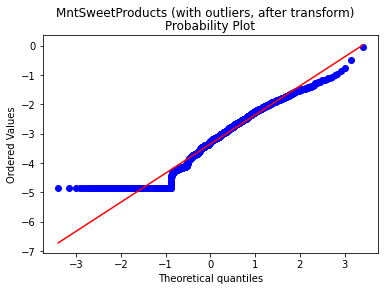

In [84]:
plt.suptitle("MntSweetProducts (with outliers, before transform)")
data["MntSweetProducts"].hist()
plt.show()

plt.suptitle("MntSweetProducts (with outliers, before transform)")
plt.boxplot(data["MntSweetProducts"].dropna(inplace=False))
plt.show()

plt.suptitle("MntSweetProducts (with outliers, before transform)")
stats.probplot(data["MntSweetProducts"], plot=pylab)
plt.show()

data["MntSweetProducts"] += 0.01
data["MntSweetProducts"], _ = boxcox(data["MntSweetProducts"])

plt.suptitle("MntSweetProducts (with outliers, after transform)")
data["MntSweetProducts"].hist()
plt.show()

plt.suptitle("MntSweetProducts (with outliers, after transform)")
plt.boxplot(data["MntSweetProducts"].dropna(inplace=False))
plt.show()

plt.suptitle("MntSweetProducts (with outliers, after transform)")
stats.probplot(data["MntSweetProducts"], plot=pylab)

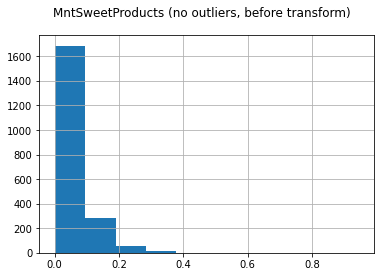

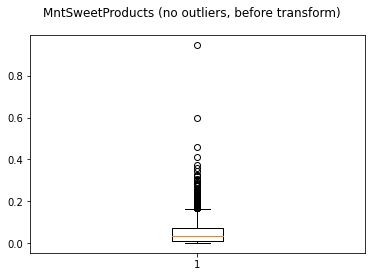

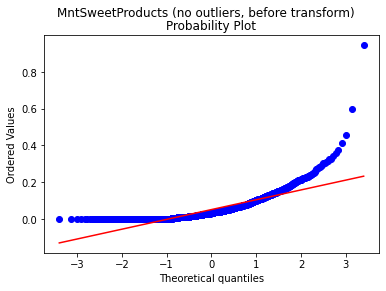

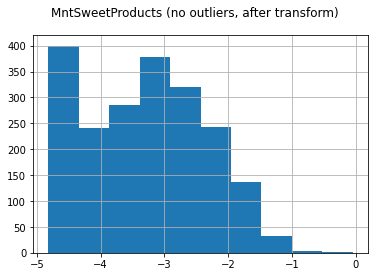

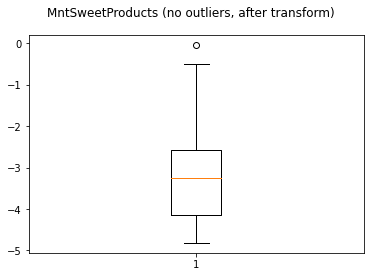

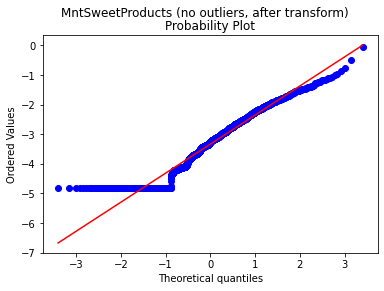

In [85]:
plt.suptitle("MntSweetProducts (no outliers, before transform)")
data_no_outliers["MntSweetProducts"].hist()
plt.show()

plt.suptitle("MntSweetProducts (no outliers, before transform)")
plt.boxplot(data_no_outliers["MntSweetProducts"].dropna(inplace=False))
plt.show()

plt.suptitle("MntSweetProducts (no outliers, before transform)")
stats.probplot(data_no_outliers["MntSweetProducts"], plot=pylab)
plt.show()

data_no_outliers["MntSweetProducts"] += 0.01
data_no_outliers["MntSweetProducts"], _ = boxcox(data_no_outliers["MntSweetProducts"])

plt.suptitle("MntSweetProducts (no outliers, after transform)")
data_no_outliers["MntSweetProducts"].hist()
plt.show()

plt.suptitle("MntSweetProducts (no outliers, after transform)")
plt.boxplot(data_no_outliers["MntSweetProducts"].dropna(inplace=False))
plt.show()

plt.suptitle("MntSweetProducts (no outliers, after transform)")
stats.probplot(data_no_outliers["MntSweetProducts"], plot=pylab)
plt.show()

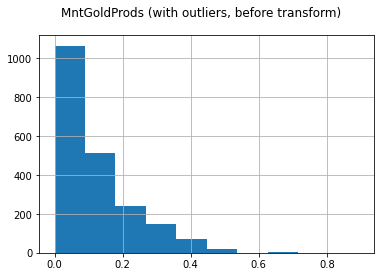

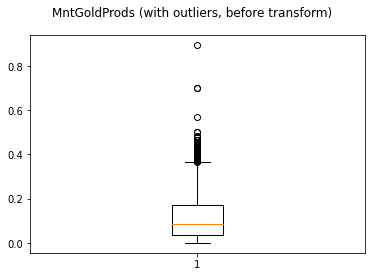

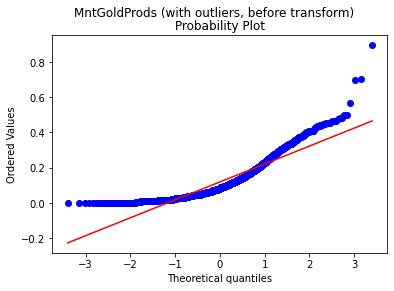

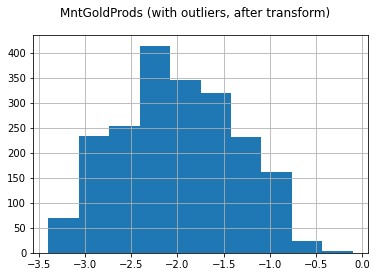

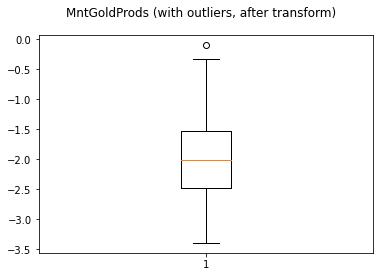

((array([-3.40014593, -3.14962659, -3.01070288, ...,  3.01070288,
          3.14962659,  3.40014593]),
  array([-3.39824415, -3.39824415, -3.39824415, ..., -0.33508738,
         -0.33120642, -0.10005508])),
 (0.640816731853771, -2.0054140339221465, 0.9944337730894484))

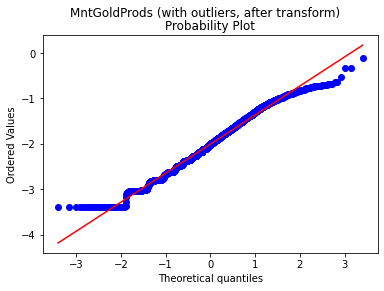

In [86]:
plt.suptitle("MntGoldProds (with outliers, before transform)")
data["MntGoldProds"].hist()
plt.show()

plt.suptitle("MntGoldProds (with outliers, before transform)")
plt.boxplot(data["MntGoldProds"].dropna(inplace=False))
plt.show()

plt.suptitle("MntGoldProds (with outliers, before transform)")
stats.probplot(data["MntGoldProds"], plot=pylab)
plt.show()

data["MntGoldProds"] += 0.01
data["MntGoldProds"], _ = boxcox(data["MntGoldProds"])

plt.suptitle("MntGoldProds (with outliers, after transform)")
data["MntGoldProds"].hist()
plt.show()

plt.suptitle("MntGoldProds (with outliers, after transform)")
plt.boxplot(data["MntGoldProds"].dropna(inplace=False))
plt.show()

plt.suptitle("MntGoldProds (with outliers, after transform)")
stats.probplot(data["MntGoldProds"], plot=pylab)

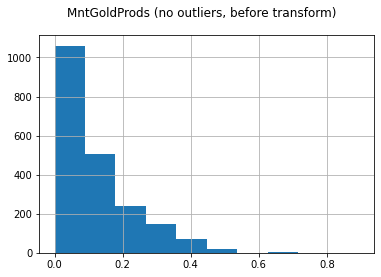

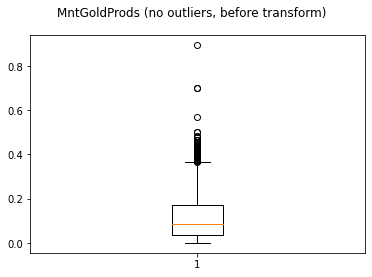

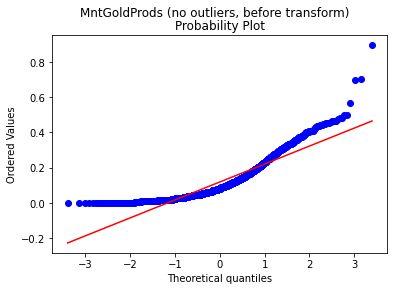

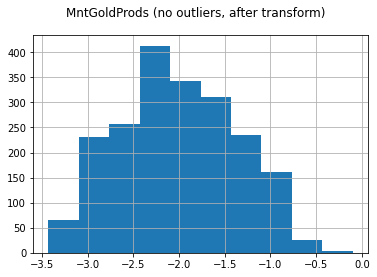

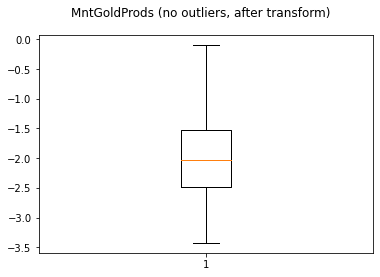

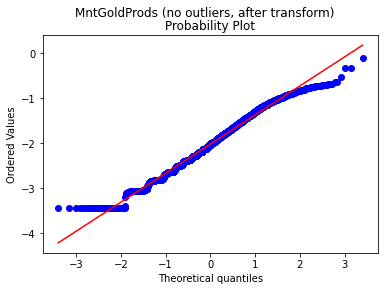

In [87]:
plt.suptitle("MntGoldProds (no outliers, before transform)")
data_no_outliers["MntGoldProds"].hist()
plt.show()

plt.suptitle("MntGoldProds (no outliers, before transform)")
plt.boxplot(data_no_outliers["MntGoldProds"].dropna(inplace=False))
plt.show()

plt.suptitle("MntGoldProds (no outliers, before transform)")
stats.probplot(data_no_outliers["MntGoldProds"], plot=pylab)
plt.show()

data_no_outliers["MntGoldProds"] += 0.01
data_no_outliers["MntGoldProds"], _ = boxcox(data_no_outliers["MntGoldProds"])

plt.suptitle("MntGoldProds (no outliers, after transform)")
data_no_outliers["MntGoldProds"].hist()
plt.show()

plt.suptitle("MntGoldProds (no outliers, after transform)")
plt.boxplot(data_no_outliers["MntGoldProds"].dropna(inplace=False))
plt.show()

plt.suptitle("MntGoldProds (no outliers, after transform)")
stats.probplot(data_no_outliers["MntGoldProds"], plot=pylab)
plt.show()

## Transformacija podataka (enkodiranje)

Pošto u koloni "Education" postoji gradacija između vrednosti, ovu kolonu pretvorićemo u numeričku, sa ordinalnim podacima:

In [88]:
new_education = np.zeros(data.shape[0])
new_education[data["Education"] == "Basic"] = 1
new_education[data["Education"] == "2n Cycle"] = 2
new_education[data["Education"] == "Graduation"] = 3
new_education[data["Education"] == "Master"] = 4
new_education[data["Education"] == "PhD"] = 5

data["Education"] = new_education

In [89]:
new_education_no_outliers = np.zeros(data_no_outliers.shape[0])
new_education_no_outliers[data_no_outliers["Education"] == "Basic"] = 1
new_education_no_outliers[data_no_outliers["Education"] == "2n Cycle"] = 2
new_education_no_outliers[data_no_outliers["Education"] == "Graduation"] = 3
new_education_no_outliers[data_no_outliers["Education"] == "Master"] = 4
new_education_no_outliers[data_no_outliers["Education"] == "PhD"] = 5

data_no_outliers["Education"] = new_education_no_outliers

Kolona "Marital_Status" biće enkodirana pomoću One-Hot enkodera:

In [90]:
data = pd.get_dummies(data, columns=["Marital_Status"])

In [91]:
data.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,MntTotal,AcceptedCmp,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,3.0,58138.0,0,0,4327,58,0.392703,-2.777815,-0.846000,...,15.619038,0,0,0,0,0,1,0,0,0
1,1954,3.0,46344.0,1,1,3481,38,0.407407,-3.100987,-1.079010,...,4.519224,0,0,0,0,0,1,0,0,0
2,1965,3.0,71613.0,0,0,3828,26,0.548969,-2.647606,-1.223079,...,12.973827,0,0,0,0,0,0,1,0,0
3,1984,3.0,26646.0,1,0,3421,26,0.207547,-2.488111,-0.776261,...,5.828698,0,0,0,0,0,0,1,0,0
4,1981,5.0,58293.0,1,0,3677,94,0.409953,-2.212800,-0.956578,...,11.032665,0,0,0,0,1,0,0,0,0


In [92]:
data_no_outliers = pd.get_dummies(data_no_outliers, columns=["Marital_Status"])

In [93]:
data_no_outliers.head()

,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,Complain,Response,MntTotal,AcceptedCmp,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow
0,1957,3.0,58138.0,0,0,4327,58,0.392703,-2.773430,-0.830500,...,0,0,1,15.582951,0,0,0,1,0,0
1,1954,3.0,46344.0,1,1,3481,38,0.407407,-3.095529,-1.052670,...,0,0,0,4.515016,0,0,0,1,0,0
2,1965,3.0,71613.0,0,0,3828,26,0.548969,-2.643621,-1.188218,...,0,0,0,12.947283,0,0,0,0,1,0
3,1984,3.0,26646.0,1,0,3421,26,0.207547,-2.484589,-0.763370,...,0,0,0,5.822042,0,0,0,0,1,0
4,1981,5.0,58293.0,1,0,3677,94,0.409953,-2.210012,-0.936357,...,0,0,0,11.012453,0,0,1,0,0,0


## Normalizacija podataka

Sada kada su sve kolone enkodirane, možemo normalizovati podatke:

In [94]:
for column in data.columns:
    data[column] = (data[column] - np.min(data[column]))/(np.max(data[column]) - np.min(data[column]))

In [95]:
data.head()
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2058 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2058 non-null   float64
 1   Education                2058 non-null   float64
 2   Income                   2058 non-null   float64
 3   Kidhome                  2058 non-null   float64
 4   Teenhome                 2058 non-null   float64
 5   Dt_Customer              2058 non-null   float64
 6   Recency                  2058 non-null   float64
 7   MntWines                 2058 non-null   float64
 8   MntFruits                2058 non-null   float64
 9   MntMeatProducts          2058 non-null   float64
 10  MntFishProducts          2058 non-null   float64
 11  MntSweetProducts         2058 non-null   float64
 12  MntGoldProds             2058 non-null   float64
 13  NumDealsPurchases        2058 non-null   float64
 14  NumWebPurchases         

In [96]:
for column in data_no_outliers.columns:
    data_no_outliers[column] = (data_no_outliers[column] - np.min(data_no_outliers[column]))/(np.max(data_no_outliers[column]) - np.min(data_no_outliers[column]))

In [97]:
data_no_outliers.head()
print(data_no_outliers.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year_Birth               2043 non-null   float64
 1   Education                2043 non-null   float64
 2   Income                   2043 non-null   float64
 3   Kidhome                  2043 non-null   float64
 4   Teenhome                 2043 non-null   float64
 5   Dt_Customer              2043 non-null   float64
 6   Recency                  2043 non-null   float64
 7   MntWines                 2043 non-null   float64
 8   MntFruits                2043 non-null   float64
 9   MntMeatProducts          2043 non-null   float64
 10  MntFishProducts          2043 non-null   float64
 11  MntSweetProducts         2043 non-null   float64
 12  MntGoldProds             2043 non-null   float64
 13  NumDealsPurchases        2043 non-null   float64
 14  NumWebPurchases         

## Određivanje optimalnog broja klastera

Za algoritme koji kao input očekuju broj klastera, neophodno je odrediti koji je optimalan broj klastera. Za to ćemo prvo upotrebiti hijerarhijsku klasterizaciju i prikazati dendrograme ovakve klasterizacije da bismo uočili jasno izdvojene klastere:

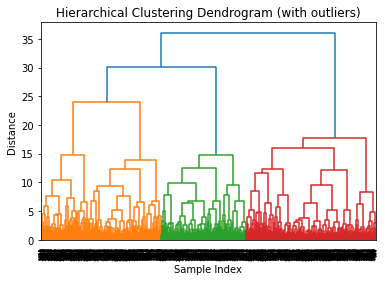

In [98]:
linked = linkage(data, 'ward')

dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (with outliers)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

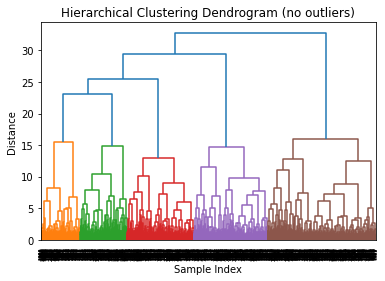

In [99]:
linked = linkage(data_no_outliers, 'ward')

dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (no outliers)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Još jedna tehnika za određivanje broja klastera koju ćemo primeniti je Elbow Method:

C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

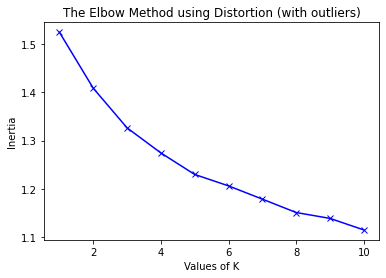

In [100]:
distortions = []
K = range(1, 11)

for k in K:
    kmeans_model = KMeans(n_clusters=k).fit(data)
    distortions.append(sum(np.min(cdist(data, kmeans_model.cluster_centers_,
                                        'euclidean'), axis=1)) / data.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Distortion (with outliers)')
plt.show()

C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

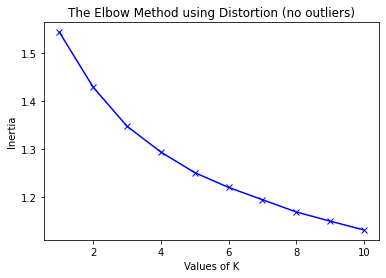

In [101]:
distortions = []
K = range(1, 11)

for k in K:
    kmeans_model = KMeans(n_clusters=k).fit(data_no_outliers)
    distortions.append(sum(np.min(cdist(data_no_outliers, kmeans_model.cluster_centers_,
                                        'euclidean'), axis=1)) / data_no_outliers.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Distortion (no outliers)')
plt.show()

Smatram da je za oba dataset-a, i onaj sa i onaj bez outlier-a najbolja vrednost od 5 klastera.

### Vizuelizacija podataka

Vizuelizovaćemo podatke u 3D prostoru kako bismo mogli bolje da uočimo klastere.

In [102]:
pca_3d = PCA(n_components=3)
PCs_3d = pd.DataFrame(pca_3d.fit_transform(data))
PCs_3d.columns = ["x", "y", "z"]

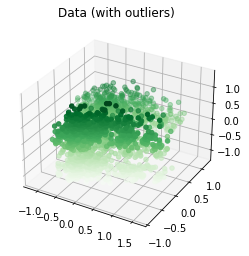

In [103]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("Data (with outliers)") 
ax.scatter3D(PCs_3d["x"], PCs_3d["y"], PCs_3d["z"], c=PCs_3d["z"], cmap='Greens')
plt.show()

In [104]:
pca_3d_no_outliers = PCA(n_components=3)
PCs_3d_no_outliers = pd.DataFrame(pca_3d_no_outliers.fit_transform(data_no_outliers))
PCs_3d_no_outliers.columns = ["x", "y", "z"]

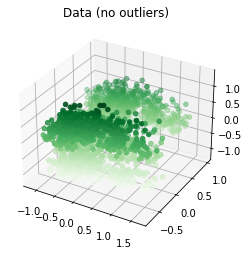

In [105]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("Data (no outliers)") 
ax.scatter3D(PCs_3d_no_outliers["x"], PCs_3d_no_outliers["y"], PCs_3d_no_outliers["z"], c=PCs_3d_no_outliers["z"], cmap='Greens')
plt.show()

## Primena nekih algoritama za klasterizaciju

U nastavku će, za sada bez ikakve analize, biti primenjeni neki osnovni klastering algoritmi. Nakon izvršene klasterizacije, proverićemo kvalitet klasterizacije. Za to ćemo iskoristiti silhouette score (vrednosti od -1 do 1, poželjna je veća vrednost) i Davies-Bouldin indeks (manja vrednost je poželjna).

### K-means 

C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


K-means with outliers:
0 : 235
2 : 282
4 : 382
3 : 462
1 : 697


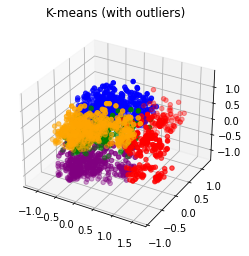

In [106]:
kmeans_model = KMeans(n_clusters=5, random_state=7).fit(data)
print("K-means with outliers:")

clusters, counts = np.unique(kmeans_model.labels_, return_counts=True)
clusters_with_counts = list(zip(clusters, counts))
clusters_with_counts.sort(key=lambda x: x[1])

k_means_labels = kmeans_model.labels_

for pair in clusters_with_counts:
    print(pair[0], ":", pair[1])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("K-means (with outliers)") 

cmaps = ['green', 'blue', 'red', 'orange', 'purple']

for i in range(5):
    ax.scatter3D(PCs_3d["x"][k_means_labels==i], PCs_3d["y"][k_means_labels==i], PCs_3d["z"][k_means_labels==i], c=cmaps[i])

plt.show()

In [107]:
silhouette = silhouette_score(data, k_means_labels)
davies_bouldin = davies_bouldin_score(data, k_means_labels)
print("Silhouette: ", silhouette)
print("Davies-Bouldin: ", davies_bouldin)

Silhouette:  0.1972230680096991
Davies-Bouldin:  1.9004242057526954


K-means no outliers:
2 : 229
3 : 274
0 : 385
1 : 461
4 : 694


C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


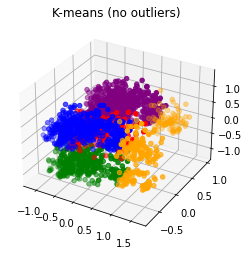

In [108]:
kmeans_model = KMeans(n_clusters=5, random_state=7).fit(data_no_outliers)
print("K-means no outliers:")

clusters, counts = np.unique(kmeans_model.labels_, return_counts=True)
clusters_with_counts = list(zip(clusters, counts))
clusters_with_counts.sort(key=lambda x: x[1])

for pair in clusters_with_counts:
    print(pair[0], ":", pair[1])

k_means_labels_no_outliers = kmeans_model.labels_

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("K-means (no outliers)") 

cmaps = ['green', 'blue', 'red', 'orange', 'purple']

for i in range(5):
    ax.scatter3D(PCs_3d_no_outliers["x"][k_means_labels_no_outliers==i], PCs_3d_no_outliers["y"][k_means_labels_no_outliers==i], PCs_3d_no_outliers["z"][k_means_labels_no_outliers==i], c=cmaps[i])

plt.show()

In [109]:
silhouette = silhouette_score(data_no_outliers, k_means_labels_no_outliers)
davies_bouldin = davies_bouldin_score(data_no_outliers, k_means_labels_no_outliers)
print("Silhouette: ", silhouette)
print("Davies-Bouldin: ", davies_bouldin)

Silhouette:  0.19308963452048739
Davies-Bouldin:  1.9033495304738466


### DBSCAN

DBSCAN with outliers:
4 : 37
-1 : 93
3 : 187
0 : 442
1 : 509
2 : 790


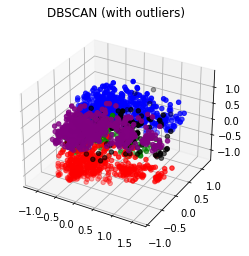

In [110]:
# min_samples je izabran kao dimenzionalnost podataka + 1
dbscan_model = DBSCAN(eps=1.42, min_samples=31).fit(data)
print("DBSCAN with outliers:")

clusters, counts = np.unique(dbscan_model.labels_, return_counts=True)
clusters_with_counts = list(zip(clusters, counts))
clusters_with_counts.sort(key=lambda x: x[1])

dbscan_labels = dbscan_model.labels_

for pair in clusters_with_counts:
    print(pair[0], ":", pair[1])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("DBSCAN (with outliers)") 

cmaps = ['red', 'purple', 'blue', 'green', 'orange', 'grey', 'pink']

for i in range(np.max(dbscan_labels)+1):
    ax.scatter3D(PCs_3d["x"][dbscan_labels==i], PCs_3d["y"][dbscan_labels==i], PCs_3d["z"][dbscan_labels==i], c=cmaps[i])

ax.scatter3D(PCs_3d["x"][dbscan_labels==-1], PCs_3d["y"][dbscan_labels==-1], PCs_3d["z"][dbscan_labels==-1], c='black')

plt.show()

In [111]:
silhouette = silhouette_score(data, dbscan_labels)
davies_bouldin = davies_bouldin_score(data, dbscan_labels)
print("Silhouette: ", silhouette)
print("Davies-Bouldin: ", davies_bouldin)

Silhouette:  0.17972050507367535
Davies-Bouldin:  2.047893435830933


DBSCAN no outliers:
4 : 39
-1 : 91
3 : 184
0 : 441
1 : 501
2 : 787


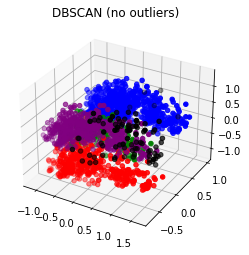

In [112]:
dbscan_model = DBSCAN(eps=1.42, min_samples=28).fit(data_no_outliers)
print("DBSCAN no outliers:")

clusters, counts = np.unique(dbscan_model.labels_, return_counts=True)
clusters_with_counts = list(zip(clusters, counts))
clusters_with_counts.sort(key=lambda x: x[1])

dbscan_labels_no_outliers = dbscan_model.labels_

for pair in clusters_with_counts:
    print(pair[0], ":", pair[1])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("DBSCAN (no outliers)") 

cmaps = ['red', 'purple', 'blue', 'green', 'orange', 'grey', 'pink']

for i in range(np.max(dbscan_labels_no_outliers)+1):
    ax.scatter3D(PCs_3d_no_outliers["x"][dbscan_labels_no_outliers==i], PCs_3d_no_outliers["y"][dbscan_labels_no_outliers==i], PCs_3d_no_outliers["z"][dbscan_labels_no_outliers==i], c=cmaps[i])

ax.scatter3D(PCs_3d_no_outliers["x"][dbscan_labels_no_outliers==-1], PCs_3d_no_outliers["y"][dbscan_labels_no_outliers==-1], PCs_3d_no_outliers["z"][dbscan_labels_no_outliers==-1], c='black')

plt.show()

In [113]:
silhouette = silhouette_score(data_no_outliers, dbscan_labels_no_outliers)
davies_bouldin = davies_bouldin_score(data_no_outliers, dbscan_labels_no_outliers)
print("Silhouette: ", silhouette)
print("Davies-Bouldin: ", davies_bouldin)

Silhouette:  0.17781395984678258
Davies-Bouldin:  2.04212511066384


### Agglomerative Clustering

Agglomerative Clustering with outliers:
4 : 135
1 : 292
3 : 448
2 : 522
0 : 661


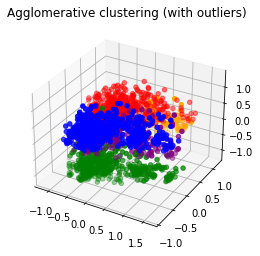

In [114]:
agglomerative_model = AgglomerativeClustering(n_clusters=5).fit(data)
print("Agglomerative Clustering with outliers:")

clusters, counts = np.unique(agglomerative_model.labels_, return_counts=True)
clusters_with_counts = list(zip(clusters, counts))
clusters_with_counts.sort(key=lambda x: x[1])

agglomerative_labels = agglomerative_model.labels_

for pair in clusters_with_counts:
    print(pair[0], ":", pair[1])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("Agglomerative clustering (with outliers)") 

cmaps = ['red', 'purple', 'blue', 'green', 'orange', 'grey', 'pink']

for i in range(5):
    ax.scatter3D(PCs_3d["x"][agglomerative_labels==i], PCs_3d["y"][agglomerative_labels==i], PCs_3d["z"][agglomerative_labels==i], c=cmaps[i])

plt.show()

In [115]:
silhouette = silhouette_score(data, agglomerative_labels)
davies_bouldin = davies_bouldin_score(data, agglomerative_labels)
print("Silhouette: ", silhouette)
print("Davies-Bouldin: ", davies_bouldin)

Silhouette:  0.1646196630426412
Davies-Bouldin:  2.0297985126170026


Agglomerative Clustering no outliers:
1 : 240
4 : 285
3 : 410
2 : 449
0 : 659


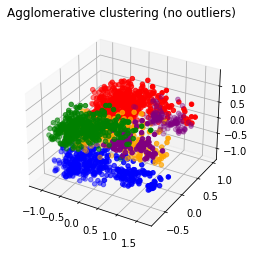

In [116]:
agglomerative_model = AgglomerativeClustering(n_clusters=5).fit(data_no_outliers)
print("Agglomerative Clustering no outliers:")

clusters, counts = np.unique(agglomerative_model.labels_, return_counts=True)
clusters_with_counts = list(zip(clusters, counts))
clusters_with_counts.sort(key=lambda x: x[1])

agglomerative_labels_no_outliers = agglomerative_model.labels_

for pair in clusters_with_counts:
    print(pair[0], ":", pair[1])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("Agglomerative clustering (no outliers)") 

cmaps = ['red', 'purple', 'blue', 'green', 'orange', 'grey', 'pink']

for i in range(5):
    ax.scatter3D(PCs_3d_no_outliers["x"][agglomerative_labels_no_outliers==i], PCs_3d_no_outliers["y"][agglomerative_labels_no_outliers==i], PCs_3d_no_outliers["z"][agglomerative_labels_no_outliers==i], c=cmaps[i])

plt.show()

In [117]:
silhouette = silhouette_score(data_no_outliers, agglomerative_labels_no_outliers)
davies_bouldin = davies_bouldin_score(data_no_outliers, agglomerative_labels_no_outliers)
print("Silhouette: ", silhouette)
print("Davies-Bouldin: ", davies_bouldin)

Silhouette:  0.17529895213857585
Davies-Bouldin:  2.015368337697013


### GMM

GMM Clustering with outliers:
4 : 168
2 : 289
3 : 453
0 : 521
1 : 627


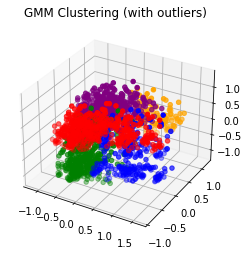

In [118]:
gmm_model = GaussianMixture(n_components=5, random_state=7).fit(data)
print("GMM Clustering with outliers:")

gmm_labels = gmm_model.predict(data)

clusters, counts = np.unique(gmm_labels, return_counts=True)
clusters_with_counts = list(zip(clusters, counts))
clusters_with_counts.sort(key=lambda x: x[1])


for pair in clusters_with_counts:
    print(pair[0], ":", pair[1])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("GMM Clustering (with outliers)") 

cmaps = ['red', 'purple', 'blue', 'green', 'orange', 'grey', 'pink']

for i in range(5):
    ax.scatter3D(PCs_3d["x"][gmm_labels==i], PCs_3d["y"][gmm_labels==i], PCs_3d["z"][gmm_labels==i], c=cmaps[i])

plt.show()

In [119]:
silhouette = silhouette_score(data, gmm_labels)
davies_bouldin = davies_bouldin_score(data, gmm_labels)
print("Silhouette: ", silhouette)
print("Davies-Bouldin: ", davies_bouldin)

Silhouette:  0.15387337820478536
Davies-Bouldin:  2.3129342657467453


GMM Clustering no outliers:
2 : 149
3 : 295
1 : 516
0 : 517
4 : 566


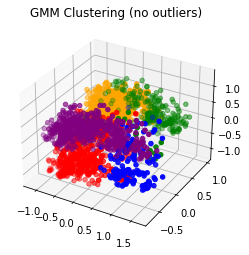

In [120]:
gmm_model = GaussianMixture(n_components=5, random_state=7).fit(data_no_outliers)
print("GMM Clustering no outliers:")

gmm_labels_no_outliers = gmm_model.predict(data_no_outliers)

clusters, counts = np.unique(gmm_labels_no_outliers, return_counts=True)
clusters_with_counts = list(zip(clusters, counts))
clusters_with_counts.sort(key=lambda x: x[1])


for pair in clusters_with_counts:
    print(pair[0], ":", pair[1])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("GMM Clustering (no outliers)") 

cmaps = ['red', 'purple', 'blue', 'green', 'orange', 'grey', 'pink']

for i in range(5):
    ax.scatter3D(PCs_3d_no_outliers["x"][gmm_labels_no_outliers==i], PCs_3d_no_outliers["y"][gmm_labels_no_outliers==i], PCs_3d_no_outliers["z"][gmm_labels_no_outliers==i], c=cmaps[i])

ax.scatter3D(PCs_3d_no_outliers["x"][gmm_labels_no_outliers==-1], PCs_3d_no_outliers["y"][gmm_labels_no_outliers==-1], PCs_3d_no_outliers["z"][gmm_labels_no_outliers==-1], c='black')

plt.show()

In [121]:
silhouette = silhouette_score(data_no_outliers, gmm_labels_no_outliers)
davies_bouldin = davies_bouldin_score(data_no_outliers, gmm_labels_no_outliers)
print("Silhouette: ", silhouette)
print("Davies-Bouldin: ", davies_bouldin)

Silhouette:  0.15200993699393345
Davies-Bouldin:  2.3403797282163183


Za sada dobijene rezultate za svaki od dataset-ova (sa i bez outlier-a) prikazani su u nastavku:

#### Sa outlier-ima

|    Algoritam      |     Silhouette            |      Davies-Bouldin    |
|-------------------|---------------------------|------------------------|
|  K-means          |  **0.1972230680096991**   | **1.9004242057526954** |
|   DBSCAN          |    0.17972050507367535    |   2.047893435830933    |
|  Agglomerative    |    0.1646196630426412     |   2.0297985126170026    |
|      GMM             |0.153873378204785362    |  2.3129342657467453    |

#### Bez outlier-a

|    Algoritam      |     Silhouette            |        Davies-Bouldin       |
|-------------------|---------------------------|-----------------------------|
|  K-means          |  **0.19308963452048739**  |      **1.9033495304738466** |
|   DBSCAN          |    0.17781395984678258    |        2.04212511066384     |
|  Agglomerative    |    0.17529895213857585    |        2.015368337697013    |
|      GMM          |    0.15200993699393345    |        2.3403797282163183   |

Na osnovu dobijenih rezultata, možemo zaključiti da se u oba slučaja najbolje pokazao K-means klastering algoritam. Zbog toga, na njemu će biti vršena optimizacija parametara i selekcija feature-a.

## Optimizacija hiperparametara za K-means algoritam

In [122]:
inits = ["k-means++", "random"]
max_iters = [100, 200, 300, 400]
algorithms = ["lloyd", "elkan"]
tols = [1e-3, 1e-4, 1e-5]

best_params = []

best_silhouette = -5
best_davies_bouldin = 10000000
best_labels = None

best_params_no_outliers = []

best_silhouette_no_outliers = -5
best_davies_bouldin_no_outliers = 10000000
best_labels_no_outliers = None

In [123]:
for init in inits:
    for max_iter in max_iters:
        for algorithm in algorithms:
            for tol in tols:
                k_means_model =  KMeans(n_clusters=5, random_state=7, init=init, max_iter=max_iter, algorithm=algorithm, tol=tol).fit(data)
                labels = k_means_model.labels_

                silhouette = silhouette_score(data, labels)
                davies_bouldin = davies_bouldin_score(data, labels)

                if (np.sqrt(best_silhouette**2 + best_davies_bouldin**2)) >= (np.sqrt(silhouette**2 + davies_bouldin**2)):
                    best_labels = labels
                    best_silhouette = silhouette
                    best_davies_bouldin = davies_bouldin
                    best_params = [init, max_iter, algorithm, tol]

C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

['k-means++', 400, 'elkan', 1e-05]
Silhouette:  0.1972230680096991
Davies-Bouldin:  1.9004242057526954


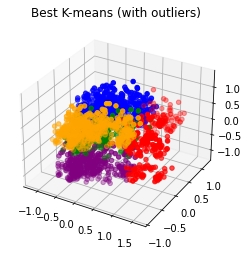

In [124]:
print(best_params)

print("Silhouette: ", best_silhouette)
print("Davies-Bouldin: ", best_davies_bouldin)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("Best K-means (with outliers)") 

cmaps = ['green', 'blue', 'red', 'orange', 'purple']

for i in range(5):
    ax.scatter3D(PCs_3d["x"][best_labels==i], PCs_3d["y"][best_labels==i], PCs_3d["z"][best_labels==i], c=cmaps[i])

plt.show()

In [125]:
for init in inits:
    for max_iter in max_iters:
        for algorithm in algorithms:
            for tol in tols:
                k_means_model =  KMeans(n_clusters=5, random_state=7, init=init, max_iter=max_iter, algorithm=algorithm, tol=tol).fit(data_no_outliers)
                labels = k_means_model.labels_

                silhouette = silhouette_score(data_no_outliers, labels)
                davies_bouldin = davies_bouldin_score(data_no_outliers, labels)

                if (np.sqrt(best_silhouette_no_outliers**2 + best_davies_bouldin_no_outliers**2)) >= (np.sqrt(silhouette**2 + davies_bouldin**2)):
                    best_labels_no_outliers = labels
                    best_silhouette_no_outliers = silhouette
                    best_davies_bouldin_no_outliers = davies_bouldin
                    best_params_no_outliers = [init, max_iter, algorithm, tol]

C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

['k-means++', 400, 'elkan', 1e-05]
Silhouette:  0.19308963452048739
Davies-Bouldin:  1.9033495304738466


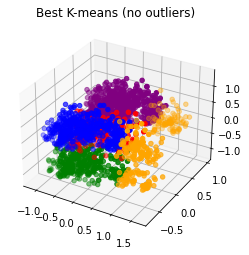

In [126]:
print(best_params_no_outliers)

print("Silhouette: ", best_silhouette_no_outliers)
print("Davies-Bouldin: ", best_davies_bouldin_no_outliers)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("Best K-means (no outliers)") 

cmaps = ['green', 'blue', 'red', 'orange', 'purple']

for i in range(5):
    ax.scatter3D(PCs_3d_no_outliers["x"][best_labels_no_outliers==i], PCs_3d_no_outliers["y"][best_labels_no_outliers==i], PCs_3d_no_outliers["z"][best_labels_no_outliers==i], c=cmaps[i])

plt.show()

Ovde ćemo uporediti rezultate pre i posle optimizacije:

Sa outlier-ima:  
$silhouette(pre)= 0.1972230680096991$  
$silhouette(posle)= 0.1972230680096991$  

$DB(pre) = 1.9004242057526954$   
$DB(posle) = 1.9004242057526954$

Bez outlier-a:  
$silhouette(pre)= 0.19308963452048739$  
$silhouette(posle)= 0.19308963452048739$  

$DB(pre) = 1.9033495304738466$   
$DB(posle) = 1.9033495304738466$

## Selekcija feature-a za K-means

Za selekciju feature-a primenićemo Lasso regresiju.

In [127]:
# Pronalazenje najboljih parametara za Lasso regresiju.
lasso_params = {"alpha":np.arange(0.00001, 10, 500)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

lasso_regresor = Lasso()
lasso_grid_cv=GridSearchCV(lasso_regresor, param_grid=lasso_params, cv=cv)
lasso_grid_cv.fit(data, best_labels)
print(lasso_grid_cv.best_params_)

C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.977e+01, tolerance: 3.265e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.835e+01, tolerance: 3.265e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

{'alpha': 1e-05}


C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.462e+01, tolerance: 3.625e-01
  model = cd_fast.enet_coordinate_descent(


C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.462e+01, tolerance: 3.625e-01
  model = cd_fast.enet_coordinate_descent(


[('Marital_Status_YOLO', -2.5573454699559677), ('Marital_Status_Divorced', -2.320370836783789), ('Marital_Status_Alone', -1.967297284246874), ('Marital_Status_Widow', -1.9135422130512967), ('Marital_Status_Married', -1.4798955811921075), ('Marital_Status_Absurd', -0.6756491197625754), ('MntWines', -0.13554192807924084), ('Year_Birth', -0.11270413996598352), ('MntSweetProducts', -0.09795918944601312), ('MntMeatProducts', -0.06972559932479454), ('Complain', -0.06795945902227847), ('Teenhome', -0.06053259658669296), ('MntTotal', -0.052542352767789104), ('Income', -0.03254864971693244), ('NumWebVisitsMonth', -0.015964903782199467), ('MntFishProducts', 0.001099916614825381), ('AcceptedCmp', 0.002405923714138323), ('Dt_Customer', 0.008484793744900836), ('MntFruits', 0.012182470179797974), ('Response', 0.02454245231888235), ('NumWebPurchases', 0.026966102927228945), ('NumStorePurchases', 0.029343044656641608), ('Kidhome', 0.03193101140083301), ('NumDealsPurchases', 0.03312312263898393), ('Num

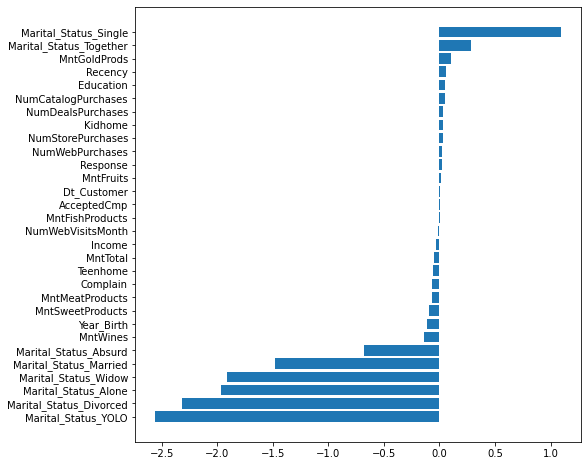

In [128]:
plt.figure(figsize=(8,8))

lasso_selector = Lasso(alpha=1e-05)
lasso_selector.fit(data, best_labels)

feature_importances = list(zip(data.columns, lasso_selector.coef_))
feature_importances.sort(key = lambda x: x[1])
plt.barh([x[0] for x in feature_importances],[x[1] for x in feature_importances])

print(feature_importances)

selected_features = feature_importances[-5:]
selected_features = [pair[0] for pair in selected_features]
print(selected_features)

In [129]:
lasso_params = {"alpha":np.arange(0.00001, 10, 500)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

lasso_regresor = Lasso()
lasso_grid_cv=GridSearchCV(lasso_regresor, param_grid=lasso_params, cv=cv)
lasso_grid_cv.fit(data_no_outliers, best_labels_no_outliers)
print(lasso_grid_cv.best_params_)

C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.690e+00, tolerance: 4.464e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.959e+00, tolerance: 4.464e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

{'alpha': 1e-05}


C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.897e+00, tolerance: 4.467e-01
  model = cd_fast.enet_coordinate_descent(
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.614e+00, tolerance: 4.960e-01
  model = cd_fast.enet_coordinate_descent(


C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.614e+00, tolerance: 4.960e-01
  model = cd_fast.enet_coordinate_descent(


[('Marital_Status_Single', -0.9991664036607165), ('MntGoldProds', -0.2416622065943451), ('Marital_Status_Together', -0.17935565241377172), ('NumWebPurchases', -0.09522202095204715), ('Teenhome', -0.08387806473121817), ('Education', -0.07863456030573532), ('MntTotal', -0.055869859129772596), ('Kidhome', -0.05312027223451512), ('NumDealsPurchases', -0.04724044380850774), ('NumWebVisitsMonth', -0.03284280986819305), ('Dt_Customer', -0.03051544620971136), ('MntFruits', -0.024104040151380627), ('Recency', 0.010752274896150504), ('MntMeatProducts', 0.01855844334206109), ('NumStorePurchases', 0.019428115040491144), ('MntFishProducts', 0.02038932281683585), ('Year_Birth', 0.046019554171177916), ('Complain', 0.048185571529547576), ('MntSweetProducts', 0.12467079264398077), ('MntWines', 0.14053907194377366), ('Income', 0.17746657018891654), ('NumCatalogPurchases', 0.21780635648482397), ('AcceptedCmp', 0.22575908481069143), ('Response', 0.34420904092021753), ('Marital_Status_Divorced', 0.72930567

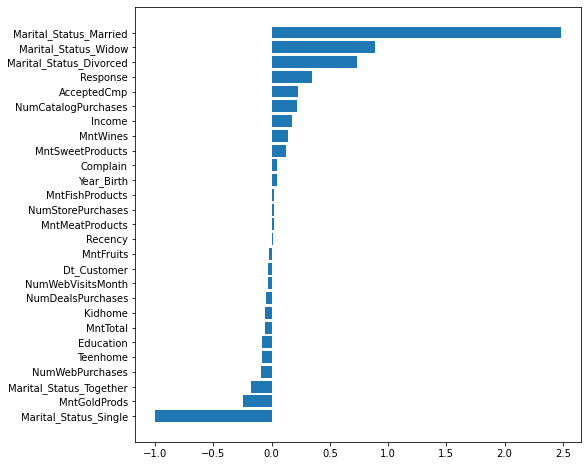

In [130]:
plt.figure(figsize=(8,8))

lasso_selector = Lasso(alpha=1e-05)
lasso_selector.fit(data_no_outliers, best_labels_no_outliers)

feature_importances = list(zip(data_no_outliers.columns, lasso_selector.coef_))
feature_importances.sort(key = lambda x: x[1])
plt.barh([x[0] for x in feature_importances],[x[1] for x in feature_importances])

print(feature_importances)

selected_features_no_outliers = feature_importances[-5:]
selected_features_no_outliers = [pair[0] for pair in selected_features_no_outliers]
print(selected_features_no_outliers)

In [131]:
data_selected = data[selected_features]
data_selected_no_outliers = data_no_outliers[selected_features_no_outliers]

Nakon selekcije feature-a, ponovo ćemo izvršiti optimizaciju hiperparametara za K-means algoritam.

In [132]:
inits = ["k-means++", "random"]
max_iters = [100, 200, 300, 400]
algorithms = ["lloyd", "elkan"]
tols = [1e-3, 1e-4, 1e-5]

best_params = []

best_silhouette = -5
best_davies_bouldin = 10000000
best_labels = None

best_params_no_outliers = []

best_silhouette_no_outliers = -5
best_davies_bouldin_no_outliers = 10000000
best_labels_no_outliers = None

In [133]:
for init in inits:
    for max_iter in max_iters:
        for algorithm in algorithms:
            for tol in tols:
                k_means_model =  KMeans(n_clusters=5, random_state=7, init=init, max_iter=max_iter, algorithm=algorithm, tol=tol).fit(data_selected)
                labels = k_means_model.labels_

                silhouette = silhouette_score(data_selected, labels)
                davies_bouldin = davies_bouldin_score(data_selected, labels)

                if (np.sqrt(best_silhouette**2 + best_davies_bouldin**2)) >= (np.sqrt(silhouette**2 + davies_bouldin**2)):
                    best_labels = labels
                    best_silhouette = silhouette
                    best_davies_bouldin = davies_bouldin
                    best_params = [init, max_iter, algorithm, tol]

C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

['random', 400, 'elkan', 1e-05]
Silhouette:  0.40660764625526524
Davies-Bouldin:  0.8951720987130287


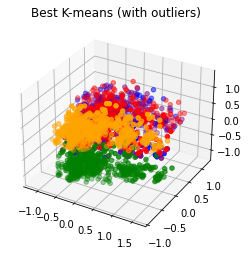

In [134]:
print(best_params)

print("Silhouette: ", best_silhouette)
print("Davies-Bouldin: ", best_davies_bouldin)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("Best K-means (with outliers)") 

cmaps = ['green', 'blue', 'red', 'purple', 'orange']

for i in range(5):
    ax.scatter3D(PCs_3d["x"][best_labels==i], PCs_3d["y"][best_labels==i], PCs_3d["z"][best_labels==i], c=cmaps[i])

plt.show()

In [135]:
for init in inits:
    for max_iter in max_iters:
        for algorithm in algorithms:
            for tol in tols:
                k_means_model =  KMeans(n_clusters=5, random_state=7, init=init, max_iter=max_iter, algorithm=algorithm, tol=tol).fit(data_selected_no_outliers)
                labels = k_means_model.labels_

                silhouette = silhouette_score(data_selected_no_outliers, labels)
                davies_bouldin = davies_bouldin_score(data_selected_no_outliers, labels)

                if (np.sqrt(best_silhouette_no_outliers**2 + best_davies_bouldin_no_outliers**2)) >= (np.sqrt(silhouette**2 + davies_bouldin**2)):
                    best_labels_no_outliers = labels
                    best_silhouette_no_outliers = silhouette
                    best_davies_bouldin_no_outliers = davies_bouldin
                    best_params_no_outliers = [init, max_iter, algorithm, tol]

C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

['random', 400, 'elkan', 1e-05]
Silhouette:  0.7140960058577855
Davies-Bouldin:  0.7508481823739033


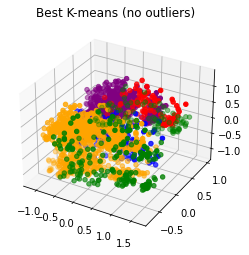

In [136]:
print(best_params_no_outliers)

print("Silhouette: ", best_silhouette_no_outliers)
print("Davies-Bouldin: ", best_davies_bouldin_no_outliers)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("Best K-means (no outliers)") 

cmaps = ['green', 'blue', 'red', 'orange', 'purple']

for i in range(5):
    ax.scatter3D(PCs_3d_no_outliers["x"][best_labels_no_outliers==i], PCs_3d_no_outliers["y"][best_labels_no_outliers==i], PCs_3d_no_outliers["z"][best_labels_no_outliers==i], c=cmaps[i])

plt.show()

Sa outlier-ima: (feature selekcija i optimizacija hiperparametara) (pre feature selekcije i posle)

$silhouette(pre)= 0.1972230680096991$  
$silhouette(posle)= 0.40660764625526524$  

$DB(pre) = 1.9004242057526954
$   
$DB(posle) =0.89517209871302877$

Bez outlier-a:  (feature selekcija i optimizacija hiperparametara)  

$silhouette(pre)= 0.18584195077011575$  
$silhouette(posle)= 0.7140960058577855$  

$DB(pre) = 1.9033495304738466$   
$DB(posle) = 0.7508481823739033$  

Možemo zaključiti da je došlo do značajnog poboljšanja nakon feature selekcije.

In [137]:
 best_labels_overall = best_labels_no_outliers

## Binarizacija kolone "Marital_status"

Proverićemo da li će binarizacija kolone "Marital_status" na vrednosti 1 (osoba je u nekoj vezi, nebitno da li je to brak ili ne) i 0 (osoba nije u vezi, razvedena je ili je udovac/udovica).

0.0     740
1.0    1318
Name: Marital_status, dtype: int64


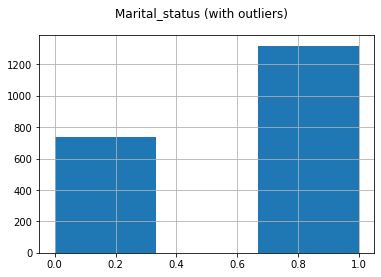

In [138]:
data["Marital_status"] = data["Marital_Status_Absurd"] + data["Marital_Status_Married"] + data["Marital_Status_Together"]
data.drop(["Marital_Status_Absurd", "Marital_Status_Alone", "Marital_Status_Divorced", "Marital_Status_Married", "Marital_Status_Single", "Marital_Status_Together", "Marital_Status_Widow", "Marital_Status_YOLO"], axis='columns', inplace=True) 

plt.suptitle("Marital_status (with outliers)")
data["Marital_status"].hist(bins=3)
print(data['Marital_status'].value_counts(dropna=False).sort_index())

0.0     735
1.0    1308
Name: Marital_status, dtype: int64


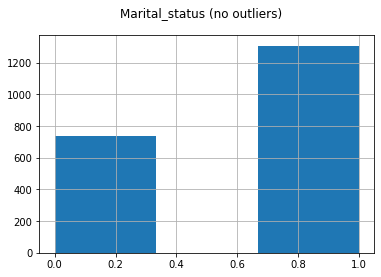

In [139]:
data_no_outliers["Marital_status"] = data_no_outliers["Marital_Status_Married"] + data_no_outliers["Marital_Status_Together"]
data_no_outliers.drop(["Marital_Status_Divorced", "Marital_Status_Married", "Marital_Status_Single", "Marital_Status_Together", "Marital_Status_Widow"], axis='columns', inplace=True) 

plt.suptitle("Marital_status (no outliers)")
data_no_outliers["Marital_status"].hist(bins=3)
print(data_no_outliers['Marital_status'].value_counts(dropna=False).sort_index())

Nakon što smo izvršili binarizaciju ove kolone, primenićemo K-means algoritam bez optimizacije parametara, kako bismo videli njegovo ponašanje na ovakvom dataset-u.

K-means with outliers:


C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3 : 275
0 : 354
2 : 374
1 : 433
4 : 622


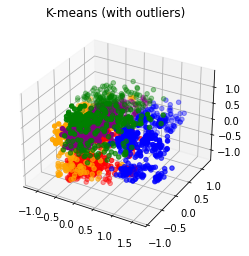

In [140]:
kmeans_model = KMeans(n_clusters=5, random_state=7).fit(data)
print("K-means with outliers:")

clusters, counts = np.unique(kmeans_model.labels_, return_counts=True)
clusters_with_counts = list(zip(clusters, counts))
clusters_with_counts.sort(key=lambda x: x[1])

k_means_labels = kmeans_model.labels_

for pair in clusters_with_counts:
    print(pair[0], ":", pair[1])

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("K-means (with outliers)") 

cmaps = ['green', 'blue', 'red', 'orange', 'purple']

for i in range(5):
    ax.scatter3D(PCs_3d["x"][k_means_labels==i], PCs_3d["y"][k_means_labels==i], PCs_3d["z"][k_means_labels==i], c=cmaps[i])

plt.show()

In [141]:
silhouette = silhouette_score(data, k_means_labels)
davies_bouldin = davies_bouldin_score(data, k_means_labels)
print("Silhouette: ", silhouette)
print("Davies-Bouldin: ", davies_bouldin)

Silhouette:  0.1446789583049272
Davies-Bouldin:  1.860694138088066


K-means no outliers:
3 : 283
2 : 337
4 : 363
0 : 442
1 : 618


C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


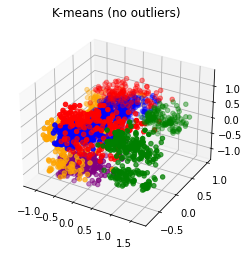

In [142]:
kmeans_model = KMeans(n_clusters=5, random_state=7).fit(data_no_outliers)
print("K-means no outliers:")

clusters, counts = np.unique(kmeans_model.labels_, return_counts=True)
clusters_with_counts = list(zip(clusters, counts))
clusters_with_counts.sort(key=lambda x: x[1])

for pair in clusters_with_counts:
    print(pair[0], ":", pair[1])

k_means_labels_no_outliers = kmeans_model.labels_

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("K-means (no outliers)") 

cmaps = ['green', 'blue', 'red', 'orange', 'purple']

for i in range(5):
    ax.scatter3D(PCs_3d_no_outliers["x"][k_means_labels_no_outliers==i], PCs_3d_no_outliers["y"][k_means_labels_no_outliers==i], PCs_3d_no_outliers["z"][k_means_labels_no_outliers==i], c=cmaps[i])

plt.show()

In [143]:
silhouette = silhouette_score(data_no_outliers, k_means_labels_no_outliers)
davies_bouldin = davies_bouldin_score(data_no_outliers, k_means_labels_no_outliers)
print("Silhouette: ", silhouette)
print("Davies-Bouldin: ", davies_bouldin)

Silhouette:  0.14111374964851317
Davies-Bouldin:  1.888943313949189


Sa outlier-ima: (K-means bez podešavanja parametara i bez feature selekcije) (pre i posle binarizacije kolone)  

$silhouette(pre)= 0.1972230680096991$  
$silhouette(posle)= 0.1446789583049272$  

$DB(pre) = 1.9004242057526954$   
$DB(posle) = 1.860694138088066$

Bez outlier-ima: (K-means bez podešavanja parametara i bez feature selekcije)  

$silhouette(pre)= 0.19308963452048739$  
$silhouette(posle)= 0.14111374964851317$  

$DB(pre) = 1.9033495304738466$   
$DB(posle) = 1.888943313949189$

Očigledno je da, bez podešavanja hiperparametara i feature selekcije dobijamo lošije rezultate, ali to ne znači nužno da ćemo dobiti lošije rezultate i nakon ova dva postupka. Zbog toga ćemo obaviti i njih da bi proverili rezultate.

### Optimizacija hiperparametara za K-means (binarizovan "Marital_status")

In [144]:
inits = ["k-means++", "random"]
max_iters = [100, 200, 300, 400]
algorithms = ["lloyd", "elkan"]
tols = [1e-3, 1e-4, 1e-5]

best_params = []

best_silhouette = -5
best_davies_bouldin = 10000000
best_labels_bin = None

best_params_no_outliers = []

best_silhouette_no_outliers = -5
best_davies_bouldin_no_outliers = 10000000
best_labels_no_outliers_bin = None

In [145]:
for init in inits:
    for max_iter in max_iters:
        for algorithm in algorithms:
            for tol in tols:
                k_means_model =  KMeans(n_clusters=5, random_state=7, init=init, max_iter=max_iter, algorithm=algorithm, tol=tol).fit(data)
                labels = k_means_model.labels_

                silhouette = silhouette_score(data, labels)
                davies_bouldin = davies_bouldin_score(data, labels)

                if (np.sqrt(best_silhouette**2 + best_davies_bouldin**2)) >= (np.sqrt(silhouette**2 + davies_bouldin**2)):
                    best_labels_bin = labels
                    best_silhouette = silhouette
                    best_davies_bouldin = davies_bouldin
                    best_params = [init, max_iter, algorithm, tol]

C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

['k-means++', 400, 'elkan', 0.001]
Silhouette:  0.14225416864214802
Davies-Bouldin:  1.8554243313622059


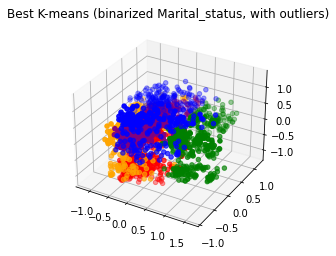

In [146]:
print(best_params)

print("Silhouette: ", best_silhouette)
print("Davies-Bouldin: ", best_davies_bouldin)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("Best K-means (binarized Marital_status, with outliers)") 

cmaps = ['green', 'blue', 'red', 'orange', 'purple']

for i in range(5):
    ax.scatter3D(PCs_3d["x"][best_labels_bin==i], PCs_3d["y"][best_labels_bin==i], PCs_3d["z"][best_labels_bin==i], c=cmaps[i])

plt.show()

In [147]:
for init in inits:
    for max_iter in max_iters:
        for algorithm in algorithms:
            for tol in tols:
                k_means_model =  KMeans(n_clusters=5, random_state=7, init=init, max_iter=max_iter, algorithm=algorithm, tol=tol).fit(data_no_outliers)
                labels = k_means_model.labels_

                silhouette = silhouette_score(data_no_outliers, labels)
                davies_bouldin = davies_bouldin_score(data_no_outliers, labels)

                if (np.sqrt(best_silhouette_no_outliers**2 + best_davies_bouldin_no_outliers**2)) >= (np.sqrt(silhouette**2 + davies_bouldin**2)):
                    best_labels_no_outliers_bin = labels
                    best_silhouette_no_outliers = silhouette
                    best_davies_bouldin_no_outliers = davies_bouldin
                    best_params_no_outliers = [init, max_iter, algorithm, tol]

C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

['k-means++', 400, 'elkan', 1e-05]
Silhouette:  0.14111374964851317
Davies-Bouldin:  1.888943313949189


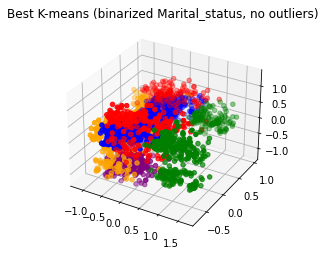

In [148]:
print(best_params_no_outliers)

print("Silhouette: ", best_silhouette_no_outliers)
print("Davies-Bouldin: ", best_davies_bouldin_no_outliers)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("Best K-means (binarized Marital_status, no outliers)") 

cmaps = ['green', 'blue', 'red', 'orange', 'purple']

for i in range(5):
    ax.scatter3D(PCs_3d_no_outliers["x"][best_labels_no_outliers_bin==i], PCs_3d_no_outliers["y"][best_labels_no_outliers_bin==i], PCs_3d_no_outliers["z"][best_labels_no_outliers_bin==i], c=cmaps[i])

plt.show()

Ovde ćemo porediti rezultate pre i posle binarizacije kolone:    

Sa outlier-ima: (K-means sa optimizovanim hiperparametrima i bez feature selekcije) (pre i posle binarizacije kolone)  

$silhouette(pre)= 0.1972230680096991$  
$silhouette(posle)= 0.14225416864214802$  

$DB(pre) = 1.9004242057526954$   
$DB(posle) = 1.8554243313622059$

Bez outlier-ima: (K-means sa optimizovanim hiperparametrima i bez feature selekcije)  

$silhouette(pre)=  0.19308963452048739$  
$silhouette(posle)= 0.14111374964851317$  

$DB(pre) = 1.9033495304738466$   
$DB(posle) = 1.888943313949189$

Rezultati su i dalje lošiji nego ranije. Ostalo je još da proverimo šta se dešava kada se izvrši feature selekcija u kombinaciji sa optimizacijom hiperparametara.

### Feature selekcija za K-means (binarizovan "Marital_status")

In [149]:
# Pronalazenje najboljih parametara za Lasso regresiju.
lasso_params = {"alpha":np.arange(0.00001, 10, 500)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

lasso_regresor = Lasso()
lasso_grid_cv=GridSearchCV(lasso_regresor, param_grid=lasso_params, cv=cv)
lasso_grid_cv.fit(data, best_labels_bin)
best_params = lasso_grid_cv.best_params_
print(lasso_grid_cv.best_params_)

{'alpha': 1e-05}


[('Income', -2.3972237894480912), ('NumCatalogPurchases', -2.2930780016218164), ('NumDealsPurchases', -1.4119985593403852), ('MntTotal', -0.36100363118065626), ('MntMeatProducts', -0.3422668045219611), ('AcceptedCmp', -0.278384057860305), ('NumStorePurchases', -0.23166857603314514), ('Response', -0.19978266414025642), ('Kidhome', -0.1792788056465468), ('MntWines', -0.14114158158283582), ('MntFishProducts', -0.11175045447227995), ('Education', -0.0966810067316808), ('NumWebVisitsMonth', -0.07216323118947694), ('Dt_Customer', -0.012475723410740209), ('MntFruits', -0.002380157917552913), ('MntGoldProds', 0.0035704044264932666), ('NumWebPurchases', 0.038899037712420766), ('Year_Birth', 0.059778011327148425), ('Recency', 0.06694818656611565), ('MntSweetProducts', 0.09995104670587249), ('Complain', 0.11542029266981323), ('Teenhome', 0.25670549640984835), ('Marital_status', 0.9395151561476764)]
['Recency', 'MntSweetProducts', 'Complain', 'Teenhome', 'Marital_status']


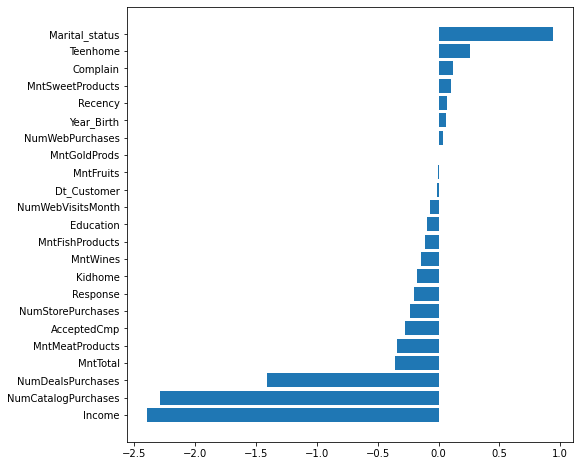

In [150]:
plt.figure(figsize=(8,8))

lasso_selector = Lasso(**best_params)
lasso_selector.fit(data, best_labels_bin)

feature_importances = list(zip(data.columns, lasso_selector.coef_))
feature_importances.sort(key = lambda x: x[1])
plt.barh([x[0] for x in feature_importances],[x[1] for x in feature_importances])

print(feature_importances)

selected_features = feature_importances[-5:]
selected_features = [pair[0] for pair in selected_features]
print(selected_features)

In [151]:
# Pronalazenje najboljih parametara za Lasso regresiju.
lasso_params = {"alpha":np.arange(0.00001, 10, 500)}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

lasso_regresor = Lasso()
lasso_grid_cv=GridSearchCV(lasso_regresor, param_grid=lasso_params, cv=cv)
lasso_grid_cv.fit(data_no_outliers, best_labels_no_outliers_bin)
best_params = lasso_grid_cv.best_params_
print(lasso_grid_cv.best_params_)

{'alpha': 1e-05}


[('Marital_status', -1.4805352438246306), ('NumCatalogPurchases', -1.3792045988147796), ('MntTotal', -0.7582515227314028), ('Response', -0.4608850513310193), ('MntWines', -0.24740829341186102), ('MntMeatProducts', -0.22022232793664462), ('AcceptedCmp', -0.1268525666249131), ('Income', -0.10750202752077773), ('MntSweetProducts', -0.03625152311796978), ('Kidhome', -0.035087619513534105), ('Recency', -0.0007714159641650414), ('Dt_Customer', 0.009044764651319823), ('Teenhome', 0.05170398954782231), ('MntFruits', 0.05419495898718312), ('MntFishProducts', 0.06349849665750085), ('NumStorePurchases', 0.13539469486753528), ('MntGoldProds', 0.14090346058729636), ('NumWebPurchases', 0.14866546361285782), ('Complain', 0.15782053533500912), ('Education', 0.17923982093594212), ('Year_Birth', 0.20618246816496993), ('NumDealsPurchases', 0.25704965549732633), ('NumWebVisitsMonth', 0.7258861282785898)]
['Complain', 'Education', 'Year_Birth', 'NumDealsPurchases', 'NumWebVisitsMonth']


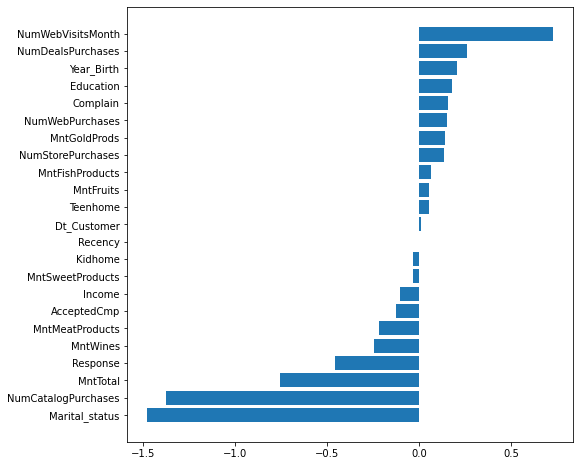

In [152]:
plt.figure(figsize=(8,8))

lasso_selector = Lasso(**best_params)
lasso_selector.fit(data_no_outliers, best_labels_no_outliers_bin)

feature_importances = list(zip(data_no_outliers.columns, lasso_selector.coef_))
feature_importances.sort(key = lambda x: x[1])
plt.barh([x[0] for x in feature_importances],[x[1] for x in feature_importances])

print(feature_importances)

selected_features_no_outliers = feature_importances[-5:]
selected_features_no_outliers = [pair[0] for pair in selected_features_no_outliers]
print(selected_features_no_outliers)

In [153]:
data_selected = data[selected_features]
data_selected_no_outliers = data_no_outliers[selected_features_no_outliers]

In [154]:
inits = ["k-means++", "random"]
max_iters = [100, 200, 300, 400]
algorithms = ["lloyd", "elkan"]
tols = [1e-3, 1e-4, 1e-5]

best_params = []

best_silhouette = -5
best_davies_bouldin = 10000000
best_labels_bin = None

best_params_no_outliers = []

best_silhouette_no_outliers = -5
best_davies_bouldin_no_outliers = 10000000
best_labels_no_outliers_bin = None

In [155]:
for init in inits:
    for max_iter in max_iters:
        for algorithm in algorithms:
            for tol in tols:
                k_means_model =  KMeans(n_clusters=5, random_state=7, init=init, max_iter=max_iter, algorithm=algorithm, tol=tol).fit(data_selected)
                labels = k_means_model.labels_

                silhouette = silhouette_score(data_selected, labels)
                davies_bouldin = davies_bouldin_score(data_selected, labels)

                if (np.sqrt(best_silhouette**2 + best_davies_bouldin**2)) >= (np.sqrt(silhouette**2 + davies_bouldin**2)):
                    best_labels_bin = labels
                    best_silhouette = silhouette
                    best_davies_bouldin = davies_bouldin
                    best_params = [init, max_iter, algorithm, tol]

C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

['k-means++', 400, 'elkan', 0.001]
Silhouette:  0.3404961573015655
Davies-Bouldin:  1.150204464655135


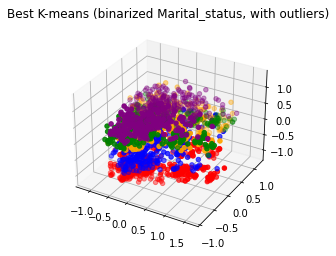

In [156]:
print(best_params)

print("Silhouette: ", best_silhouette)
print("Davies-Bouldin: ", best_davies_bouldin)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("Best K-means (binarized Marital_status, with outliers)") 

cmaps = ['green', 'blue', 'red', 'purple', 'orange']

for i in range(5):
    ax.scatter3D(PCs_3d["x"][best_labels_bin==i], PCs_3d["y"][best_labels_bin==i], PCs_3d["z"][best_labels_bin==i], c=cmaps[i])

plt.show()

In [157]:
for init in inits:
    for max_iter in max_iters:
        for algorithm in algorithms:
            for tol in tols:
                k_means_model =  KMeans(n_clusters=5, random_state=7, init=init, max_iter=max_iter, algorithm=algorithm, tol=tol).fit(data_selected_no_outliers)
                labels = k_means_model.labels_

                silhouette = silhouette_score(data_selected_no_outliers, labels)
                davies_bouldin = davies_bouldin_score(data_selected_no_outliers, labels)

                if (np.sqrt(best_silhouette_no_outliers**2 + best_davies_bouldin_no_outliers**2)) >= (np.sqrt(silhouette**2 + davies_bouldin**2)):
                    best_labels_no_outliers_bin = labels
                    best_silhouette_no_outliers = silhouette
                    best_davies_bouldin_no_outliers = davies_bouldin
                    best_params_no_outliers = [init, max_iter, algorithm, tol]

C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\andje\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\clus

['random', 400, 'elkan', 1e-05]
Silhouette:  0.4865854679196004
Davies-Bouldin:  0.7603854110127769


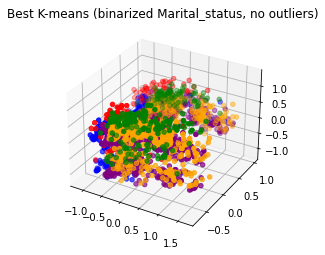

In [158]:
print(best_params_no_outliers)

print("Silhouette: ", best_silhouette_no_outliers)
print("Davies-Bouldin: ", best_davies_bouldin_no_outliers)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_title("Best K-means (binarized Marital_status, no outliers)") 

cmaps = ['green', 'blue', 'red', 'orange', 'purple']

for i in range(5):
    ax.scatter3D(PCs_3d_no_outliers["x"][best_labels_no_outliers_bin==i], PCs_3d_no_outliers["y"][best_labels_no_outliers_bin==i], PCs_3d_no_outliers["z"][best_labels_no_outliers_bin==i], c=cmaps[i])

plt.show()

Ovde ćemo porediti rezultate pre i posle binarizacije kolone:    

Sa outlier-ima: (K-means sa optimizovanim hiperparametrima i sa feature selekcijom) (pre i posle binarizacije kolone)  

$silhouette(pre)= 0.40660764625526524$  
$silhouette(posle)= 0.3404961573015655$  

$DB(pre) = 0.8951720987130287$   
$DB(posle) = 1.150204464655135$

Bez outlier-ima: (K-means sa optimizovanim hiperparametrima i bez feature selekcije)  

$silhouette(pre)=  0.7140960058577855$  
$silhouette(posle)= 0.4865854679196004$  

$DB(pre) = 0.7508481823739033$   
$DB(posle) = 0.7603854110127769$

Rezultati su i dalje lošiji nego ranije. S toga, možemo zaključiti da nam binarizacija kolone "Marital_status" nije donela ništa dobro, i da su rezultati bili bolji pre njene modifikacije.

# Analiza najboljih rezultata

Razdvojićemo inicijalni dataset na 5 podskupova na osnovu labela dobijenih klasterizacijom - od 0 do 4.

In [159]:
cluster_0 = original_data_no_outliers[best_labels_overall == 0]
cluster_1 = original_data_no_outliers[best_labels_overall == 1]
cluster_2 = original_data_no_outliers[best_labels_overall == 2]
cluster_3 = original_data_no_outliers[best_labels_overall == 3]
cluster_4 = original_data_no_outliers[best_labels_overall == 4]

Nakon toga, za svaki klaster prikazaćemo statistike i histograme podataka.

        Year_Birth         Income     Kidhome    Teenhome  Dt_Customer  \
count   268.000000     268.000000  268.000000  268.000000   268.000000   
mean   1969.850746   59669.787313    0.358209    0.283582  3958.761194   
std      12.692271   23492.046932    0.495719    0.475811   233.484793   
min    1943.000000    7500.000000    0.000000    0.000000  3360.000000   
25%    1959.000000   38561.750000    0.000000    0.000000  3778.750000   
50%    1971.000000   63276.500000    0.000000    0.000000  3983.000000   
75%    1981.000000   80135.750000    1.000000    1.000000  4142.500000   
max    1996.000000  105471.000000    2.000000    2.000000  4419.000000   

          Recency    MntWines   MntFruits  MntMeatProducts  MntFishProducts  \
count  268.000000  268.000000  268.000000       268.000000       268.000000   
mean    34.511194    0.450587    0.044402         0.279030         0.056192   
std     26.908290    0.223512    0.050364         0.141731         0.055559   
min      0.000000

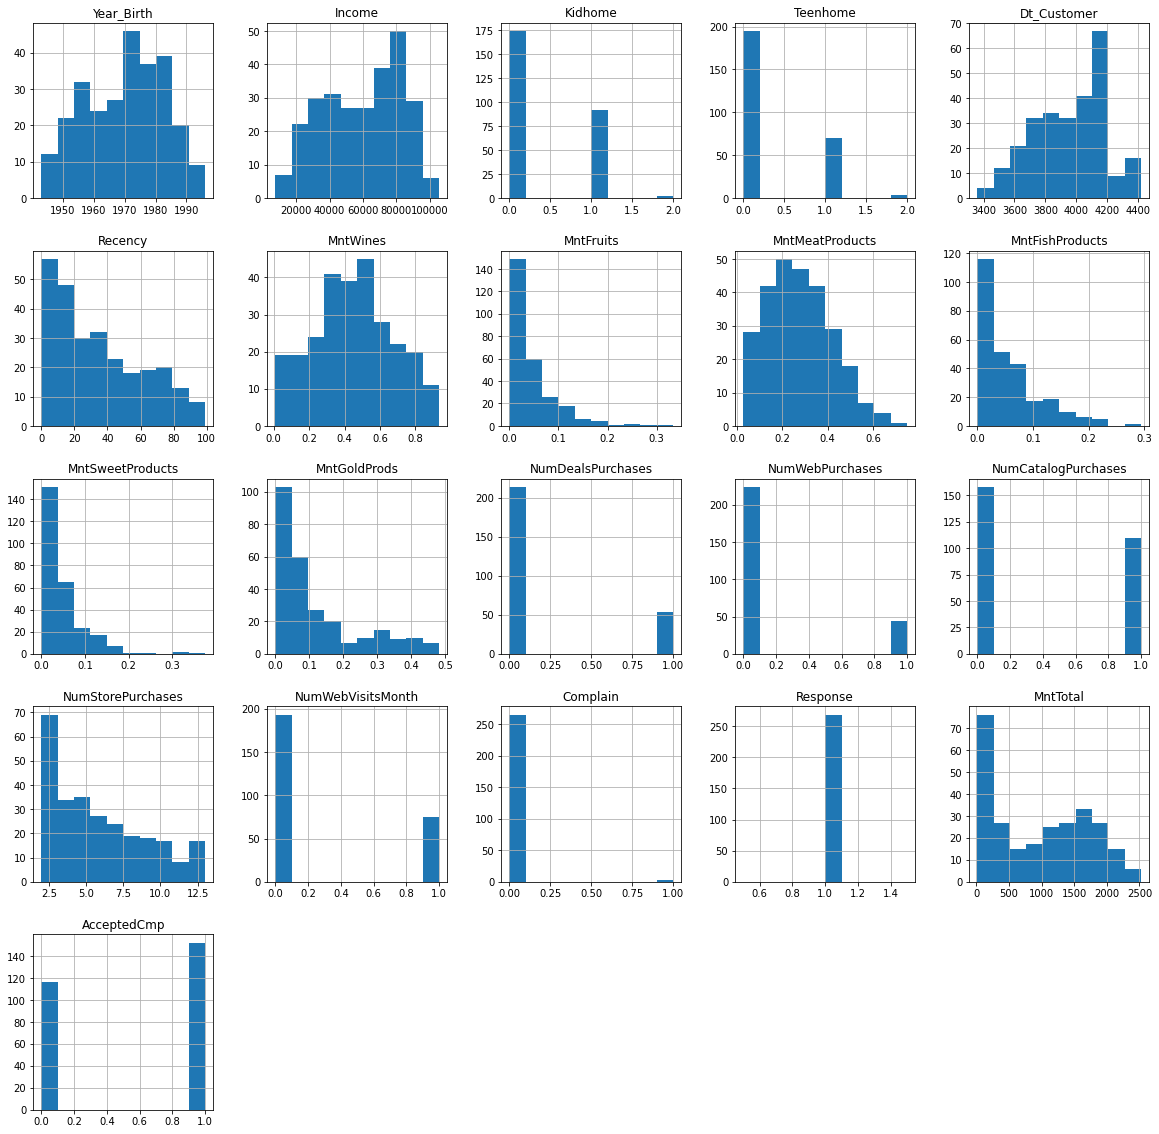

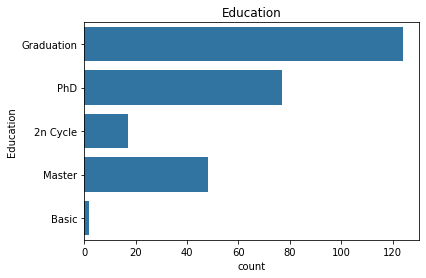

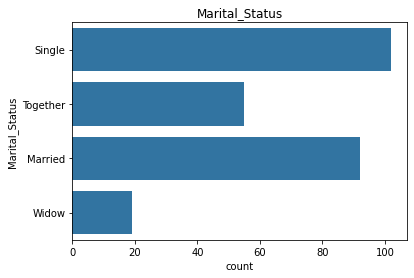

In [160]:
print(cluster_0.describe())
cluster_0.hist(figsize=(20, 20))
plt.show()
sns.countplot(cluster_0, y="Education").set(title="Education")
plt.show()
sns.countplot(cluster_0, y="Marital_Status").set(title="Marital_Status")
plt.show()

        Year_Birth         Income     Kidhome    Teenhome  Dt_Customer  \
count   214.000000     214.000000  214.000000  214.000000   214.000000   
mean   1966.271028   52596.429907    0.415888    0.607477  3878.869159   
std       9.678465   19990.743609    0.530683    0.543973   225.289239   
min    1943.000000    1730.000000    0.000000    0.000000  3387.000000   
25%    1959.000000   37373.000000    0.000000    0.000000  3712.500000   
50%    1967.000000   52683.000000    0.000000    1.000000  3879.000000   
75%    1973.750000   68625.750000    1.000000    1.000000  4040.750000   
max    1989.000000  102692.000000    2.000000    2.000000  4417.000000   

          Recency    MntWines   MntFruits  MntMeatProducts  MntFishProducts  \
count  214.000000  214.000000  214.000000       214.000000       214.000000   
mean    49.154206    0.483713    0.046694         0.242776         0.063696   
std     28.839194    0.228589    0.048508         0.128707         0.069730   
min      0.000000

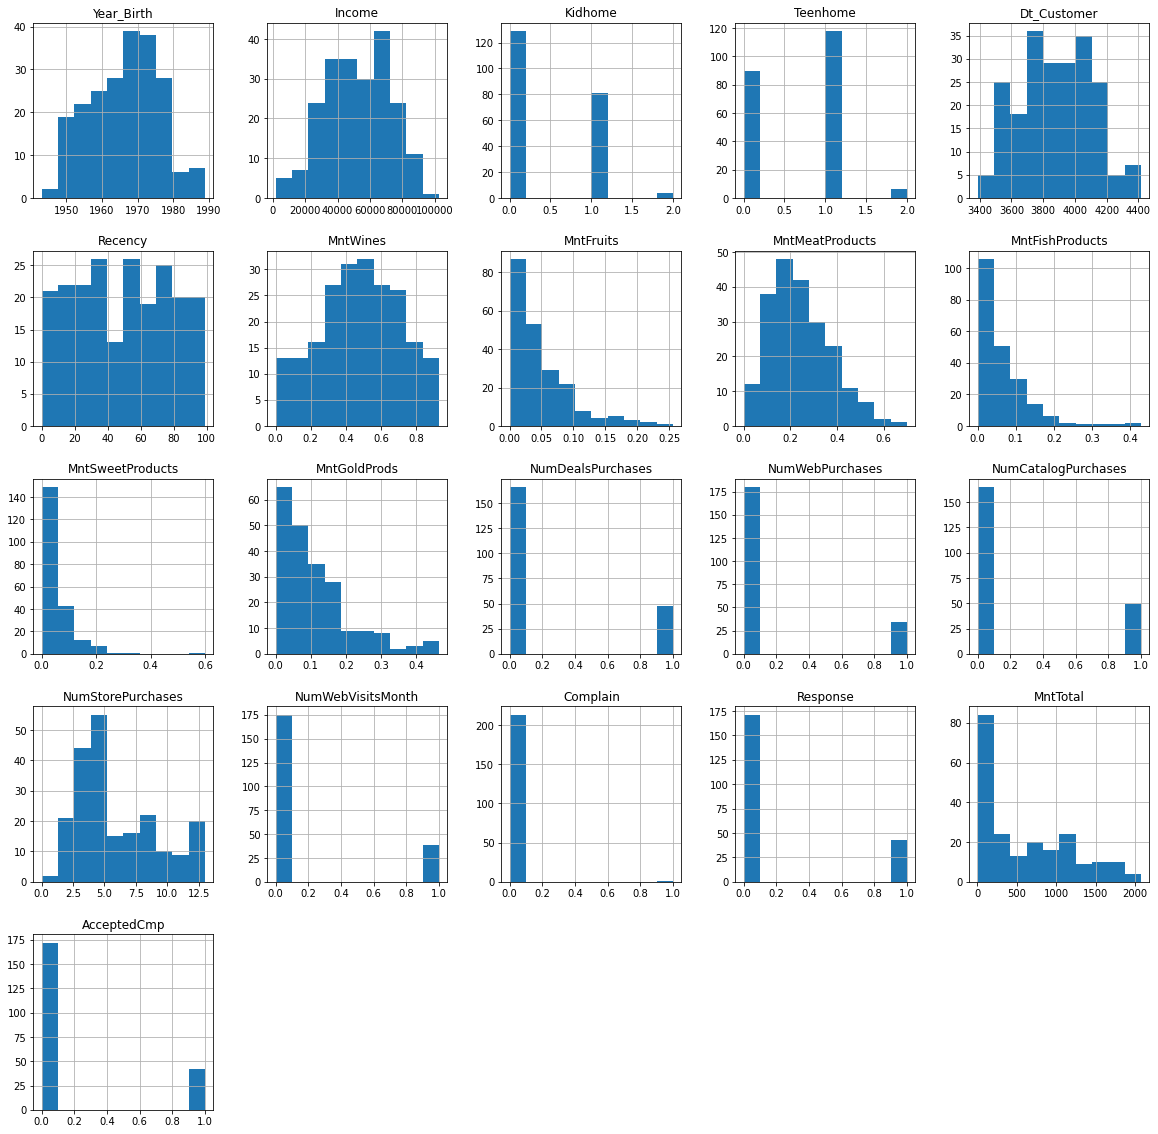

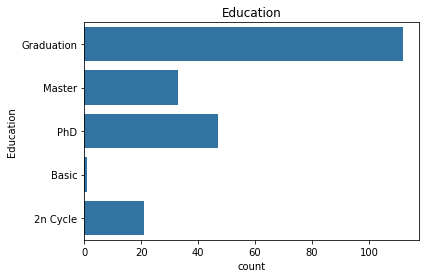

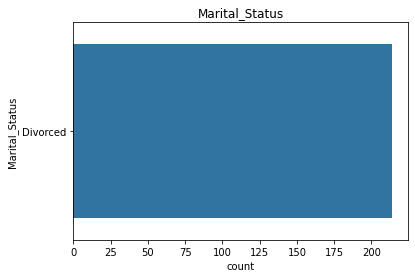

In [161]:
print(cluster_1.describe())
cluster_1.hist(figsize=(20, 20))
plt.show()
sns.countplot(cluster_1, y="Education").set(title="Education")
plt.show()
sns.countplot(cluster_1, y="Marital_Status").set(title="Marital_Status")
plt.show()

        Year_Birth        Income     Kidhome    Teenhome  Dt_Customer  \
count   111.000000    111.000000  111.000000  111.000000   111.000000   
mean   1967.342342  65223.495495    0.243243    0.468468  3818.288288   
std      12.243362  18550.651574    0.430987    0.553005   248.951744   
min    1941.000000  14421.000000    0.000000    0.000000  3357.000000   
25%    1957.000000  52546.000000    0.000000    0.000000  3647.000000   
50%    1969.000000  67536.000000    0.000000    0.000000  3790.000000   
75%    1975.000000  79987.500000    0.000000    1.000000  3996.000000   
max    1996.000000  94642.000000    1.000000    2.000000  4417.000000   

          Recency    MntWines   MntFruits  MntMeatProducts  MntFishProducts  \
count  111.000000  111.000000  111.000000       111.000000       111.000000   
mean    55.765766    0.575453    0.031264         0.224175         0.046556   
std     28.364496    0.229873    0.030954         0.136797         0.050033   
min      1.000000    0.000

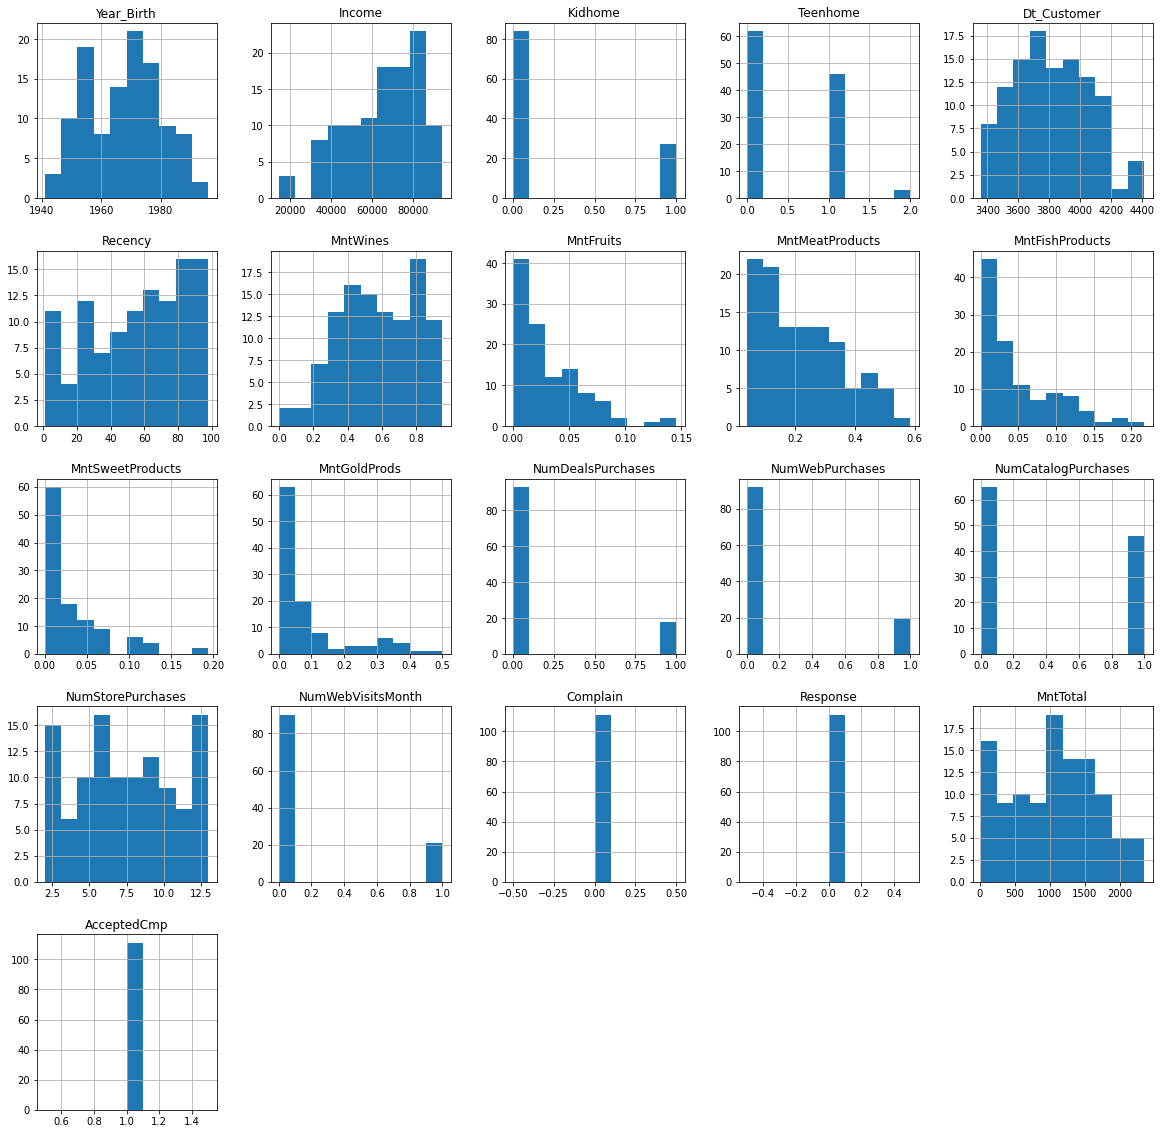

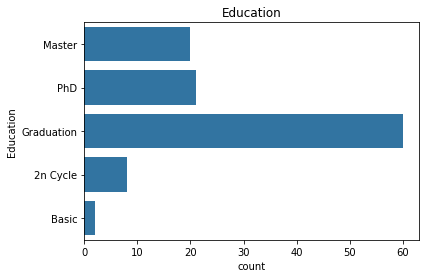

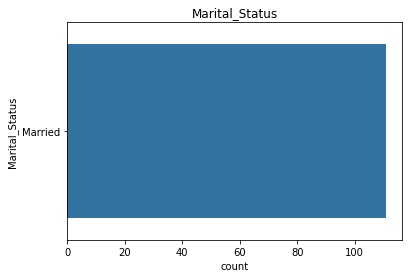

In [162]:
print(cluster_2.describe())
cluster_2.hist(figsize=(20, 20))
plt.show()
sns.countplot(cluster_2, y="Education").set(title="Education")
plt.show()
sns.countplot(cluster_2, y="Marital_Status").set(title="Marital_Status")
plt.show()

        Year_Birth         Income     Kidhome    Teenhome  Dt_Customer  \
count   861.000000     861.000000  861.000000  861.000000   861.000000   
mean   1968.878049   49990.628339    0.466899    0.527294  3848.771196   
std      11.947277   19786.639155    0.541645    0.546244   228.428488   
min    1940.000000    3502.000000    0.000000    0.000000  3356.000000   
25%    1959.000000   34350.000000    0.000000    0.000000  3674.000000   
50%    1970.000000   50014.000000    0.000000    1.000000  3847.000000   
75%    1978.000000   65488.000000    1.000000    1.000000  4020.000000   
max    1995.000000  113734.000000    2.000000    2.000000  4419.000000   

          Recency    MntWines   MntFruits  MntMeatProducts  MntFishProducts  \
count  861.000000  861.000000  861.000000       861.000000       861.000000   
mean    52.867596    0.454751    0.048878         0.247865         0.075207   
std     27.970144    0.224643    0.054386         0.120496         0.082507   
min      0.000000

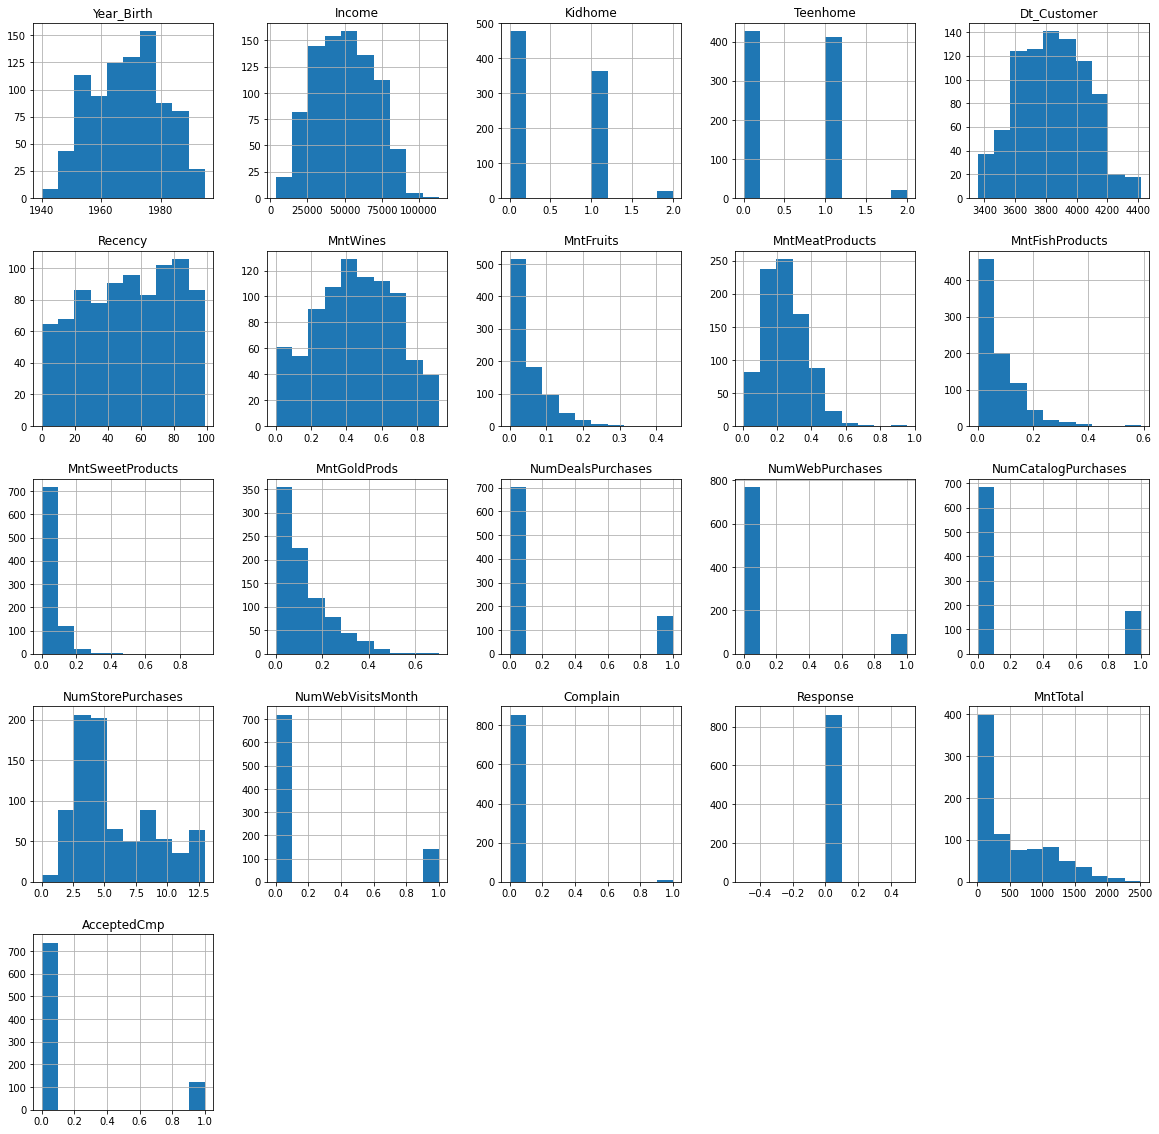

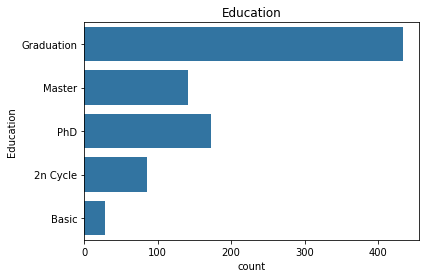

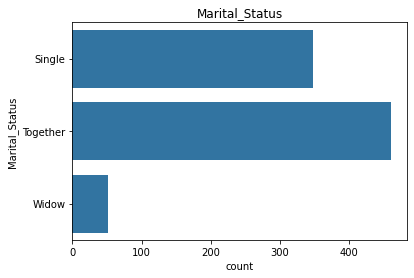

In [163]:
print(cluster_3.describe())
cluster_3.hist(figsize=(20, 20))
plt.show()
sns.countplot(cluster_3, y="Education").set(title="Education")
plt.show()
sns.countplot(cluster_3, y="Marital_Status").set(title="Marital_Status")
plt.show()

        Year_Birth        Income     Kidhome    Teenhome  Dt_Customer  \
count   589.000000    589.000000  589.000000  589.000000   589.000000   
mean   1969.634975  47582.365025    0.507640    0.561969  3857.028862   
std      11.178250  18851.984873    0.558204    0.551726   227.148834   
min    1943.000000   2447.000000    0.000000    0.000000  3357.000000   
25%    1961.000000  32871.000000    0.000000    0.000000  3692.000000   
50%    1971.000000  48006.000000    0.000000    1.000000  3851.000000   
75%    1978.000000  62694.000000    1.000000    1.000000  4021.000000   
max    1992.000000  89058.000000    2.000000    2.000000  4416.000000   

          Recency    MntWines   MntFruits  MntMeatProducts  MntFishProducts  \
count  589.000000  589.000000  589.000000       589.000000       589.000000   
mean    48.568761    0.441531    0.056664         0.244967         0.077172   
std     29.396667    0.231959    0.064372         0.118426         0.082591   
min      0.000000    0.000

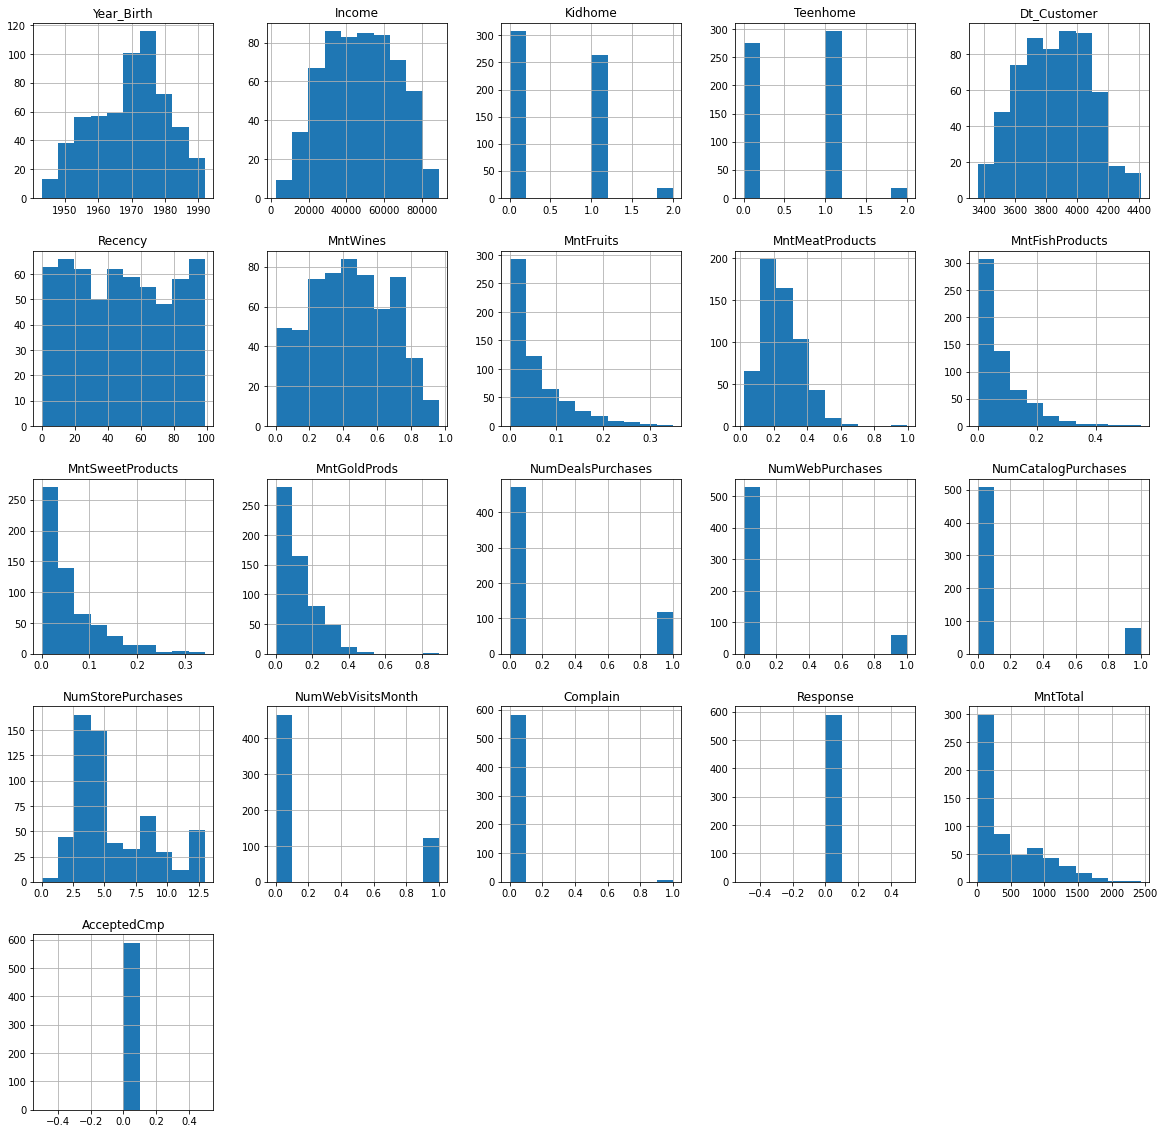

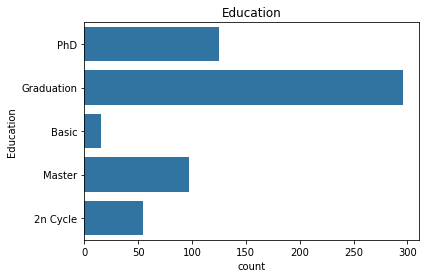

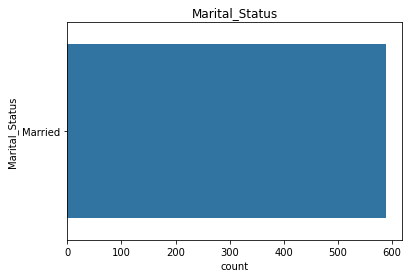

In [164]:
print(cluster_4.describe())
cluster_4.hist(figsize=(20, 20))
plt.show()
sns.countplot(cluster_4, y="Education").set(title="Education")
plt.show()
sns.countplot(cluster_4, y="Marital_Status").set(title="Marital_Status")
plt.show()

Iscrtaćemo tabele sa prosečnim vrednostima svake od kolona za klastere, kako bismo ih lakše uporedili. Za kolonu "Education" biće prikazana dominantna vrednost, a za kolonu "Marital_Status" biće upisana vrednost "Mixed" ukoliko postoji varijacija unutar grupe, ili ona vrednost koja jedina postoji unutar klastera.

|Cluster|Year_Birth| Income |Kidhome|Teenhome|Dt_customer|Recency| Education|Marital_Status|
|:-----:|:--------:|:------:|:-----:|:------:|:---------:|:-----:|:--------:|:------------:|
|   0   |   1969   |59669.79|  0.36 |  0.28  |  3957.76  |  34.5 |Graduation|      Mixed   ||   1   |   1966   |52596.43|  0.42 |  0.61  |  3877.87  |  49.15|Graduation|    Divorced  |
|   2   |   1967   |65223.50|  0.24 |  0.47  |  3817.29  |  55.77|Graduation|     Married  |
|   3   |   1968   |49990.63|  0.47 |  0.53  |  3847.77  |  52.87|Graduation|      Mixed   |
|   4   |   1969   |47582.36|  0.51 |  0.56  |  3856.03  |  48.57|Graduation|     Married  |





Na osnovu ovih podataka, za sada možemo zaključiti da je korisnici iz klastera 2 zarađuju najviše novca, te bi se njima potencijalno trebale reklamirati skuplje stvari sa sajta. 

Klasteri 1, 3 i 4 imaju dosta dece - treba im reklamirati proizvode koji bi deci bili privlačni. Proizvode privlačne tinejdžerima treba reklamirati svim klasterima sem klasteru 0.

Treba takođe primetiti i da su svi korisnici unutar klastera 1 razvedeni, dok su svi korisnici unutar klastera 2 i 4 u braku. Ovo se može iskoristiti za reklamne kampanje - na primer, klasteru 1 mogu biti odbojne reklame koje prikazuju srećne porodice i/ili parove, dok će, naprotiv, druga dva klastera ovakve reklame možda podstaći na kupovinu. 

|Cluster|MntTotal|MntWines|MntFruits|MntMeatProducts|MntFishProducts|MntGoldProds|
|:-----:|:------:|:------:|:-------:|:-------------:|:-------------:|:----------:|
|   0   | 976.07 |  0.45  |   0.04  |      0.28     |      0.06     |     0.12   |
|   1   | 611.09 |  0.48  |   0.05  |      0.24     |      0.06     |     0.11   |
|   2   | 1050.21|  0.58  |   0.03  |      0.22     |      0.05     |     0.09   |
|   3   | 538.58 |  0.45  |   0.05  |      0.25     |      0.08     |     0.12   |
|   4   | 449.11 |  0.44  |   0.06  |      0.24     |      0.08     |     0.12   |

Može se primetiti da ne postoji velika razlika u prosečnom vremenu potrošenom po kategoriji između klastera. Međutim, postoji razlika u ukupnom vremenu koje su klasteri proveli na sajtu - klasteri 0 i 2 provode znatno više vremena na sajtu od ostalih. Zbog toga, treba pronaći način da se kupci iz ostalih klastera podstaknu na kupovinu - možda da im se da kupon za popust na sledeću online kupovinu, ili nešto slično.

Takođe, kada su u pitanju sami proizvodi, svi klasteri najviše vremena provode na katerogijama vina i mesnih proizvoda. To znači da će za akcije nad ovim proizvodima biti zainteresovana većina korisnika sajta. Najlošije "posećene" kategorije su voće i riba. To znači da ovi proizvodi nisu toliko privlačni mušterijama, te da možda nema svrhe reklamirati ih toliko. Takođe, s obzirom na to da se ti proizvodi verovatno i slabije prodaju, možda nije pogodno davati česte akcije za njih, jer već nema mnogo zarade.

Zanimljivo je i primetiti da, iako klaster 2 ima najveću kupovnu moć (gledajući zaradu), u odnosu na druge klastere provodi nešto manje vremena u kategoriji proizvoda od zlata, koji su obično među skupljima. Možda bi se forsiranjem reklama za ovakve proizvode kod tih kupaca oni podstakli da kupuju više ovih proizvoda, čime bi se povećala i zarada sajta.

|Cluster|NumDealsPurchases|NumWebPurchases|NumCatalogPurchases|NumStorePurchases|NumWebVisitsMonth|Complain|Response|AcceptedCmp|
|:-----:|:---------------:|:-------------:|:-----------------:|:---------------:|:---------------:|:------:|:------:|:----------|
|   0   |       0.20      |     0.16      |        0.41       |      5.94       |       0.27      |  0.01  |  1.00  |    0.57   |
|   1   |       0.22      |     0.16      |        0.22       |      5.87       |       0.18      |  0.00  |  0.20  |    0.20   |
|   2   |       0.16      |     0.17      |        0.41       |      7.46       |       0.19      |  0.00  |  0.00  |    1.00   |
|   3   |       0.18      |     0.11      |        0.20       |      5.66       |       0.16      |  0.01  |  0.00  |    0.14   |
|   4   |       0.20      |     0.10      |        0.14       |      5.58       |       0.21      |  0.01  |  0.00  |    0.00   |

Kod klastera 0 i 2, katalozi su se pokazali kao jako efikasni - ovim klasterima bi ih obavezno trebalo slati. 

Klaster 0 je odlično odgovarao na kampanje u prošlosti, a naročito dobro na prošlu - uspešnost je bila 100%. U budućnosti ovom klasteru treba slati slične kampanje kao što je bila prethodna. Međutim, prošla kampanja je prošla jako loše kod svih ostalih klastera - samo je još klaster 1 kupovao. Stoga, za ostale klastere treba razmotriti promenu marketinške kampanje. 

Ceo klaster 2 je u prošlosti kupovao proizvode iz kampanja, ali niko od ovih kupaca nije kupovao tokom prošle kampanje. Ovo znači da ćemo, ukoliko budemo posmatrali ranije kampanje, možda pronaći nešto zajedničko između njih i naći u kom pravcu treba da idu reklame za ove kupce.

Klasteri 3 i 4, a naročito klaster 4, su jako problematični kada su kampanje u pitanju. Prošla im nije odgovarala uopšte, a klasteru 4 nije odgovarala ni jedna. Ovo znači da je za ove klastere neophodna značajna promena kada su u pitanju reklame i kampanje za proizvode.

Klaster 2 najviše kupuje u radnji - ovim korisnicima obavezno treba reklamirati popuste koji važe samo u prodavnicama. Sa druge strane, ovaj klaster, kao i klaster 3, je nešto manje kupovao proizvode za koje im je poslato obaveštenje da su na popustu - možda bi trebalo pokušati sa nekim drugim proizvodima.

Klasteri 3 i 4 manje kupuju online - ovim klasterima bi možda trebalo dati neki vaučer za online kupovinu kako bi se podstakli da više kupuju. Klaster 3 i manje posećuje sajt od ostalih - opet, treba naći način da se stimulišu da kupuju online.

# Sažetak za svaki od klastera

Klaster 0:
- Provode dosta vremena na sajtu - slati im obaveštenja o online popustima
- Slati im kataloge
- Kampanje su im odgovarale u prošlosti, naročito prošla - sledeće za njih treba da budu slične
  

Klaster 1:
- Svi u klasteru su razvedeni - mogu im biti odbojne reklame koje prikazuju porodice i/ili parove
- Iako su svi razvedeni, u domaćinstvima ima i dosta dece i dosta tinejdžera - reklamirati proizvode privlačne ovim grupama
- Treba ih podstaći da provode više vremena na sajtu
- Prošla kampanja, kao i sve prethodne, je mlako prihvaćena - potrebne su korekcije

Klaster 2:
- Svi u klasteru su u braku - reklame s porodicama mogu biti stimulišuće
- Dosta tinejdžera u domaćinstvima - reklamirati njima privlačne proizvode
- Zarađuju najviše novca - treba im reklamirati skuplje proizvode, naročito zlato
- Provode dosta vremena na sajtu - slati im obaveštenja o online popustima
- Slati im kataloge
- Svi su u prošlosti kupili nešto reklamirano tokom kampanje, ali niko nije kupovao tokom prošle kampanje - nije im odgovarala, potrebna je promena
- Dosta kupuju u radnjama - reklamirati im popuste koji važe samo u prodavnicama
- Slabije su kupovali proizvode na popustu - probati sa nekim drugim proizvodima


Klaster 3:
- Dosta dece i tinejdžera u domaćinstvima - slati reklame za njima privlačne proizvode
- Treba ih podstaći da provode više vremena na sajtu
- Slabo prihvataju proizvode iz kampanja, proizvode iz prošle kampanje niko nije kupio - potrebna promena marketinga
- Manje posećuju sajt od ostalih klastera i malo kupuju online - možda im dati vaučere i popuste za online kupovinu kako bi se podstakli da kupuju online
- Malo su kupovali proizvode na popustu - probati sa nekim drugim proizvodima

Klaster 4:
- Svi u klasteru su u braku - reklame s porodicama mogu biti stimulišuće
- Dosta tinejdžera u domaćinstvima - reklamirati njima privlačne proizvode
- Treba ih podstaći da provode više vremena na sajtu
- Niko nikada nije kupio proizvod reklamiran pomoću kampanje - potrebna potpuna promena marketinga
- Manje kupuju online - davati im popuste za online kupovinu


# Sažetak za proizvode

Visoko interesovanje:
- Vino
- Proizvodi od mesa

Ove proizvode obavezno reklamirati svima.

Nisko interesovanje:
- Voće
- Riba

Verovatno nema svrhe reklamirati ove proizvode. Može se pokušati sa jednom kampanjom, čisto da se vidi da li će podići interesovanje, ali, ukoliko ne podigne, verovatno je bolje fokusirati se na poželjnije proizvode.